# Análisis de prueba de los proyectos de Dr. Snap!

## Extracción y limpieza de los datos del dataframe

Se importan las librerías que se necesitan para poder hacer el análisis y se carga el fichero csv que contiene la totalidad de los proyectos almacenados.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 6)
#plt.style.use('fivethirtyeight')

In [71]:
df_dr_snap = pd.read_csv("results_snap.csv")
df_dr_snap. head()

Project  \
0                         U1L2-Gossip   
1  Dancing project - Alexander Browne   
2                          hello game   
3                U1L3-Graphic Design2   
4                         alonzo BRUH   

                                                Path         Level  Score  \
0  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Intermediate      2   
1  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...         Basic      1   
2  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...         Basic      1   
3  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...         Basic      1   
4  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...         Basic      1   

   Average  Conditional  Synchronization  Flow Control  Abstraction  \
0    1.500            0                2             1            3   
1    1.125            0                1             2            1   
2    1.250            1                0             2            1   
3    0.875            0                0             1            3   
4    0.875            0                0             0            3   

   Parallelism  Diversity  User Interactivity  Data  
0            3          2                   0     1  
1            1          2                   1     1  
2            0          2                   3     1  
3            0          2                   0     1  
4            1          1                   2     0

Se visualiza como son las 5 primeras filas del dataframe. Para cada proyecto de Dr. Snap! analizado se especifica su ruta absoluta, el nivel alcanzado en el proyecto, que depende de la puntuación asignada por redondeo de la media de las 8 dimensiones consideradas a la hora de evaluar el pensamiento computacional. Estas 8 competencias son: uso de condicionales, sincronismo, flujo de control, abstracción, paralelismo, diversidad, interactividad con el usuario y datos. Estas variables son discretas y toman valores de 0, 1, 2 o 3.

El dataset completo cuenta con 113906 proyectos de Dr. Snap y 12 variables o columnas, además de la correspondiente al nombre de los proyectos.

In [3]:
df_dr_snap.shape

(113906, 13)

In [4]:
df_dr_snap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113906 entries, 0 to 113905
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Project             113894 non-null  object 
 1   Path                113906 non-null  object 
 2   Level               113906 non-null  object 
 3   Score               113906 non-null  int64  
 4   Average             113906 non-null  float64
 5   Conditional         113906 non-null  int64  
 6   Synchronization     113906 non-null  int64  
 7   Flow Control        113906 non-null  int64  
 8   Abstraction         113906 non-null  int64  
 9   Parallelism         113906 non-null  int64  
 10  Diversity           113906 non-null  int64  
 11  User Interactivity  113906 non-null  int64  
 12  Data                113906 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 11.3+ MB


In [5]:
df_dr_snap["Level"] = pd.Categorical(df_dr_snap["Level"])
list_col_to_int = ['Score', 'Conditional', 'Synchronization', 'Flow Control', 'Abstraction', 'Parallelism',
                   'Diversity', 'User Interactivity', 'Data']
for column in list_col_to_int:
    df_dr_snap[column] = df_dr_snap[column].astype(np.uint8)
df_dr_snap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113906 entries, 0 to 113905
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Project             113894 non-null  object  
 1   Path                113906 non-null  object  
 2   Level               113906 non-null  category
 3   Score               113906 non-null  uint8   
 4   Average             113906 non-null  float64 
 5   Conditional         113906 non-null  uint8   
 6   Synchronization     113906 non-null  uint8   
 7   Flow Control        113906 non-null  uint8   
 8   Abstraction         113906 non-null  uint8   
 9   Parallelism         113906 non-null  uint8   
 10  Diversity           113906 non-null  uint8   
 11  User Interactivity  113906 non-null  uint8   
 12  Data                113906 non-null  uint8   
dtypes: category(1), float64(1), object(2), uint8(9)
memory usage: 3.7+ MB


El nivel obtenido en cada proyecto, se agrupa en 4 categorías en función de la puntuación asignada o "Score". Estas categorías son: no level, basic, intermediate y advanced.
Además se realiza otra transformación pasando las variables de tipo entero a enteros sin signo de 8 bits, para que ocupe menos memoria nuestro dataset.

In [6]:
df_dr_snap.describe(include=object)

Project                                               Path
count             113894                                             113906
unique             56246                                             113906
top     U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...
freq                2085                                                  1

En la muestra hay 56246 proyectos con un nombre único, por lo que la mitad de los proyectos están repetidos ya sea porque el mismo programador lo haya guardado varias veces o distintos programadores hayan probado a realizar la misma animación o videojuego. Existe un proyecto o dato que sería la moda del conjunto total de proyectos, al ser el más frecuente, pues se repite 2085 veces. Sin embargo todos los proyectos tienen un path único.

In [7]:
df_dr_snap[df_dr_snap["Project"] == "U1L1-ClickAlonzo"]

Project                                               Path  \
8       U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
9       U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
18      U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
34      U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
42      U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
...                  ...                                                ...   
110497  U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
111811  U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
111846  U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
111855  U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
113029  U1L1-ClickAlonzo  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   

               Level  Score  Average  Conditional  Synchronization  \
8              Basic      1    0.875            0                0   
9              Basic      1    1.250            0                1   
18             Basic      1    0.875            0                0   
34             Basic      1    1.250            0                1   
42             Basic      1    1.250            0                1   
...              ...    ...      ...          ...              ...   
110497         Basic      1    1.250            0                1   
111811  Intermediate      2    1.625            0                2   
111846  Intermediate      2    1.625            1                1   
111855         Basic      1    1.250            0                1   
113029  Intermediate      2    2.375            3                3   

        Flow Control  Abstraction  Parallelism  Diversity  User Interactivity  \
8                  0            3            1          1                   2   
9                  2            1            1          2                   2   
18                 0            3            1          1                   2   
34                 2            1            1          2                   2   
42                 2            1            1          2                   2   
...              ...          ...          ...        ...                 ...   
110497             2            1            1          2                   2   
111811             1            3            1          2                   1   
111846             2            3            1          2                   2   
111855             2            1            1          2                   2   
113029             3            1            1          3                   3   

        Data  
8          0  
9          1  
18         0  
34         1  
42         1  
...      ...  
110497     1  
111811     3  
111846     1  
111855     1  
113029     2  

[2085 rows x 13 columns]

Se comprueba si hay algún proyecto con algún dato faltante. Se observa que hay 12 proyectos sin nombre asignado. No los tenemos en cuenta para posteriores cálculos.

In [8]:
df_dr_snap[df_dr_snap["Project"].isnull()]
#df_dr_snap[df_dr_snap.isna().any(axis=1)]

Project                                               Path  \
2542       NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
4319       NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
18187      NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
29487      NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
36567      NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
71969      NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
72137      NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
78973      NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
84000      NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
100591     NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
112874     NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   
113726     NaN  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...   

               Level  Score  Average  Conditional  Synchronization  \
2542    Intermediate      2    2.125            0                3   
4319    Intermediate      2    2.125            1                3   
18187   Intermediate      2    1.500            3                0   
29487       No level      0    0.125            0                0   
36567          Basic      1    0.625            0                0   
71969   Intermediate      2    1.500            0                2   
72137          Basic      1    1.250            0                1   
78973          Basic      1    0.750            0                0   
84000       No level      0    0.125            0                0   
100591         Basic      1    1.375            0                1   
112874         Basic      1    0.625            0                0   
113726  Intermediate      2    2.000            0                3   

        Flow Control  Abstraction  Parallelism  Diversity  User Interactivity  \
2542               2            2            3          3                   2   
4319               2            1            3          3                   2   
18187              2            0            0          3                   3   
29487              0            0            0          1                   0   
36567              2            1            0          1                   0   
71969              2            2            2          2                   1   
72137              2            1            1          2                   2   
78973              2            1            0          2                   0   
84000              0            0            0          1                   0   
100591             2            1            1          3                   1   
112874             1            0            0          2                   1   
113726             2            2            3          2                   2   

        Data  
2542       2  
4319       2  
18187      1  
29487      0  
36567      1  
71969      1  
72137      1  
78973      1  
84000      0  
100591     2  
112874     1  
113726     2

In [9]:
df_dr_snap = df_dr_snap.dropna().reset_index(drop=True)
#df_dr_snap.reset_index(inplace=True)

In [10]:
df_dr_snap.shape

(113894, 13)

## Análisis de los proyectos por nivel. Frecuencias de los proyectos sin nivel, con nivel básico, con nivel medio, con nivel avanzado.

Se quiere ver cuántos proyectos son clasificados en cada uno de los 4 niveles indicados anteriormente. Se representa esta distinción entre niveles de manera gráfica.

In [11]:
dic_level = df_dr_snap["Level"].value_counts().to_dict()
dic_level

{'Basic': 61005, 'Intermediate': 43297, 'Advanced': 7492, 'No level': 2100}

['limegreen', 'lightskyblue', 'coral', 'gold']


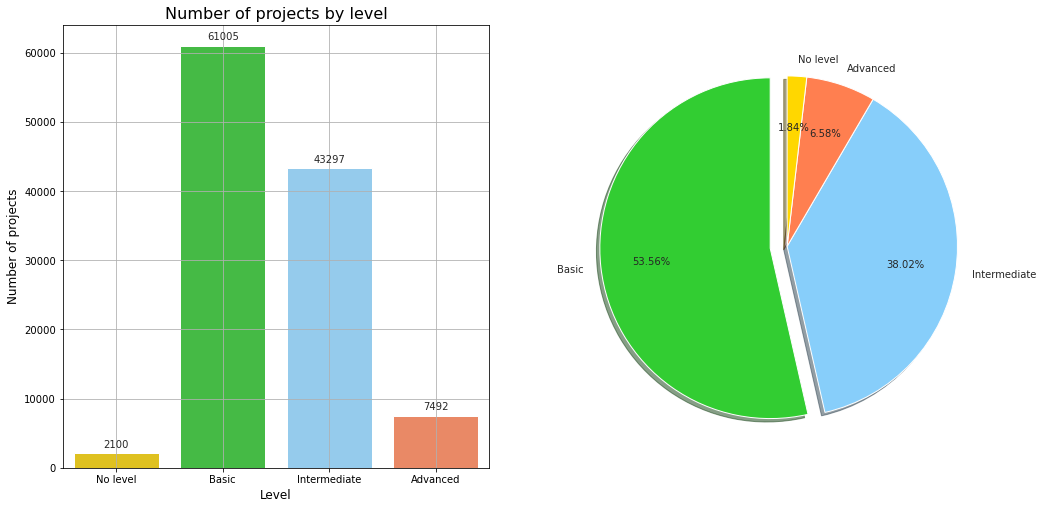

In [12]:
values = dic_level.values()
names = dic_level.keys()
colors_level = {"No level":"gold", "Basic":"limegreen", "Intermediate":"lightskyblue", "Advanced":"coral"}
colors = [colors_level[x] for x in dic_level.keys()]
print(colors)
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 7))
fig.tight_layout(pad=2)
plt.subplot(1,2,1)
sns.set_style('whitegrid')
#ax1 = sns.countplot(df_dr_snap["Level"], order=["No level", "Basic", "Intermediate", "Advanced"], palette=colors_level)
ax1 = sns.countplot(x="Level", data=df_dr_snap, order=["No level", "Basic", "Intermediate", "Advanced"], palette=colors_level)
for patch in ax1.patches:
    ax1.annotate(format(patch.get_height(), '.0f'),(patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.title("Number of projects by level", fontsize=16)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
ax1.grid(True)
#colors = ["#ff7f0e", "#2ca02c", "#d62728", "#1f77b4"]
plt.subplot(1,2,2)
explode = (0.1, 0, 0, 0)
plt.pie(values, explode=explode, labels=names, autopct='%1.2f%%', shadow=True, startangle=90, pctdistance=0.7, colors=colors)
ax2.grid(False)
plt.show()

El nivel básico y el nivel intermedio son los más frecuentes, contando con un 53,56% y un 38,02% de los proyectos, respectivamente. Se tienen 2100 proyectos con puntuaciones medias ("Average") inferiores o iguales a 0.5, que se corresponden con la categoría sin nivel. Únicamente 7492 proyectos consiguen las máximas puntuaciones medias, entre 2.5 y 3, del nivel avanzado.

A continuación se filtra por nivel, para conocer cómo se distribuyen las puntuaciones medias de los proyectos en cada uno de los 4 niveles.

In [13]:
filt_no_level = df_dr_snap['Level'].str.contains('No level', na=False)
df_dr_snap_no_level = df_dr_snap.loc[filt_no_level].sort_values(by="Average")
df_dr_snap_no_level

Project  \
142                            Kaleidoscope1   
55908  Excision - Die For You (Feat. Akylla)   
55892                    U2L1-NumberGuessing   
55872                      sprite characters   
55860                   U1L3-PullutasigCorey   
...                                      ...   
24808                      The Recursive Web   
73480                           Dylans Intro   
73492                           Hello Isaiah   
72742                              Project S   
66876                                Lab 0.4   

                                                    Path     Level  Score  \
142    /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
55908  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
55892  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
55872  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
55860  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
...                                                  ...       ...    ...   
24808  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
73480  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
73492  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
72742  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   
66876  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  No level      0   

       Average  Conditional  Synchronization  Flow Control  Abstraction  \
142      0.125            0                0             0            0   
55908    0.125            0                0             0            0   
55892    0.125            0                0             0            0   
55872    0.125            0                0             0            0   
55860    0.125            0                0             0            0   
...        ...          ...              ...           ...          ...   
24808    0.375            0                0             1            0   
73480    0.375            0                0             1            0   
73492    0.375            0                0             1            0   
72742    0.375            0                0             1            0   
66876    0.375            0                0             1            0   

       Parallelism  Diversity  User Interactivity  Data  
142              0          1                   0     0  
55908            0          1                   0     0  
55892            0          1                   0     0  
55872            0          1                   0     0  
55860            0          1                   0     0  
...            ...        ...                 ...   ...  
24808            0          1                   1     0  
73480            0          1                   1     0  
73492            0          1                   1     0  
72742            0          1                   1     0  
66876            0          1                   1     0  

[2100 rows x 13 columns]

Text(0, 0.5, 'Frequency of no level projects')

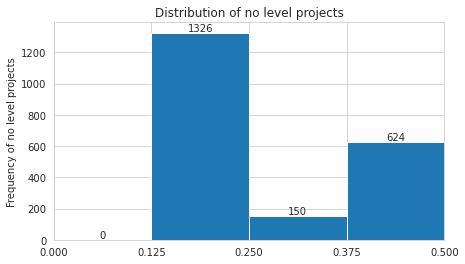

In [14]:
f, ax = plt.subplots(figsize=(7,4))
#sns.histplot(df_dr_snap_no_level, x="Average", bins=4, stat="count")
plt.hist(df_dr_snap_no_level["Average"], bins=4, range=(0, 0.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=0, right=0.5)
ax.set_xticks(np.linspace(0, 0.5, 5))
plt.title("Distribution of no level projects")
plt.ylabel("Frequency of no level projects")

En este histograma de la categoría sin nivel se observa que la mayor parte de los proyectos, en concreto 1326, toman el valor medio de 0.125. No hay nigún proyecto con puntuación media de 0. Todos tienen al menos un punto asignado en alguno de los 8 aspectos que caracterizan el pensamiento computacional en Dr. Snap!

In [15]:
filt_basic = df_dr_snap['Level'].str.contains('Basic', na=False)
df_dr_snap_basic = df_dr_snap.loc[filt_basic].sort_values(by="Average")
df_dr_snap_basic.tail()

Project  \
88932                           u1L3NEW   
34425   Newtons Law of Planetary Motion   
34419                        Lab 5 UL22   
34456                           Lab 3.2   
113891                   U2L4-brickwall   

                                                     Path  Level  Score  \
88932   /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Basic      1   
34425   /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Basic      1   
34419   /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Basic      1   
34456   /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Basic      1   
113891  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Basic      1   

        Average  Conditional  Synchronization  Flow Control  Abstraction  \
88932     1.375            0                1             2            3   
34425     1.375            0                0             2            2   
34419     1.375            0                0             1            3   
34456     1.375            0                0             1            3   
113891    1.375            0                0             3            3   

        Parallelism  Diversity  User Interactivity  Data  
88932             0          2                   2     1  
34425             2          2                   1     2  
34419             1          2                   1     3  
34456             0          2                   3     2  
113891            1          2                   1     1

Text(0.5, 0, 'Average')

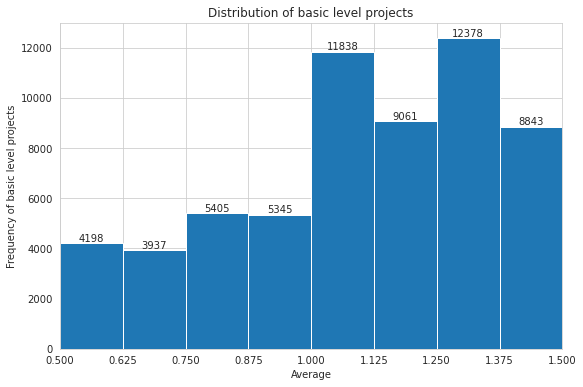

In [16]:
f, ax = plt.subplots(figsize=(9,6))
plt.hist(df_dr_snap_basic["Average"], bins=8, range=(0.5, 1.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=0.5, right=1.5)
ax.set_xticks(np.linspace(0.5, 1.5, 9))
plt.title("Distribution of basic level projects")
plt.ylabel("Frequency of basic level projects")
plt.xlabel("Average")

Las mayores frecuencias absolutas para el nivel básico se obtienen para las puntuaciones medias de 1 y de 1.25, donde 11838 y 12378 proyectos son valorados con dichas puntuaciones. Las  puntuaciones más bajas para este nivel, entre 0,5 y 0,875, tienen menores cantidades de proyectos, mientras que a partir de 1 punto se consiguen mayores frecuencias absolutas o nº de proyectos para cada puntuación media.

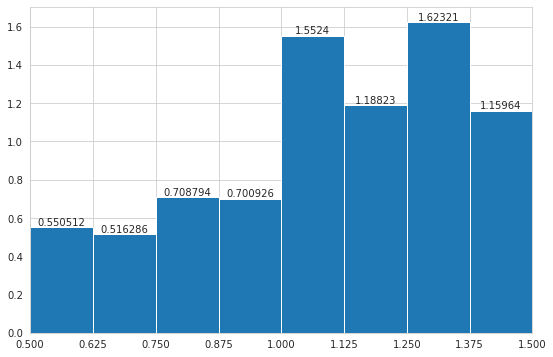

In [17]:
# En el caso de que el área sea igual a la unidad. Aprox. a la fdp.
f, ax = plt.subplots(figsize=(9,6))
plt.hist(df_dr_snap_basic["Average"],bins=8, density=True, range=(0.5, 1.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=0.5, right=1.5)
ax.set_xticks(np.linspace(0.5, 1.5, 9))

In [18]:
filt_intermediate = df_dr_snap['Level'].str.contains('Intermediate', na=False)
df_dr_snap_intermediate = df_dr_snap.loc[filt_intermediate].sort_values(by="Average")
df_dr_snap_intermediate.head()

Project  \
0                      U1L2-Gossip   
51593  Lab 2.2 - Yellow Brick Road   
51599           Burnt Corn Alabama   
51600                       lizard   
51615                  CoinFlipSim   

                                                    Path         Level  Score  \
0      /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Intermediate      2   
51593  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Intermediate      2   
51599  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Intermediate      2   
51600  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Intermediate      2   
51615  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Intermediate      2   

       Average  Conditional  Synchronization  Flow Control  Abstraction  \
0          1.5            0                2             1            3   
51593      1.5            0                2             3            1   
51599      1.5            0                2             1            2   
51600      1.5            0                2             1            2   
51615      1.5            2                1             2            0   

       Parallelism  Diversity  User Interactivity  Data  
0                3          2                   0     1  
51593            1          2                   1     2  
51599            3          2                   1     1  
51600            3          2                   1     1  
51615            0          2                   3     2

Text(0.5, 0, 'Average')

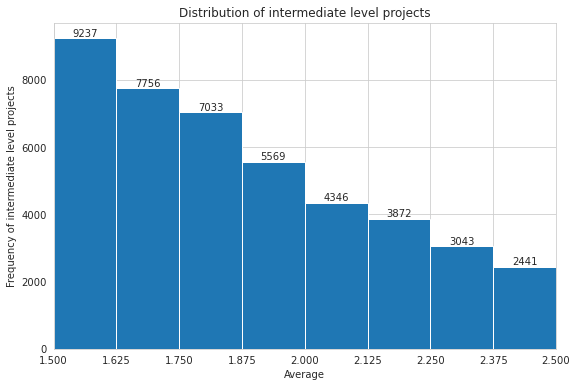

In [19]:
f, ax = plt.subplots(figsize=(9,6))
#sns.histplot(df_dr_snap_intermediate, x="Average", bins=8, stat="count")
plt.hist(df_dr_snap_intermediate["Average"], bins=8, range=(1.5, 2.5))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=1.5, right=2.5)
ax.set_xticks(np.linspace(1.5, 2.5, 9))
plt.title("Distribution of intermediate level projects")
plt.ylabel("Frequency of intermediate level projects")
plt.xlabel("Average")

Los proyectos se agrupan en mayor proporción en torno a 1,5 puntos. La cantidad de proyectos o nº de ocurrencias de cada puntuación media sigue una tendencia descendente desde ese valor hasta los 2,375 puntos, que representa la puntuación máxima para este nivel intermedio, donde solamente 2441 proyectos toman dicha puntuación media.

In [20]:
filt_advanced = df_dr_snap['Level'].str.contains('Advanced', na=False)
df_dr_snap_advanced = df_dr_snap.loc[filt_advanced].sort_values(by="Average")
df_dr_snap_advanced.tail()

Project  \
60739                        Hangman   
32034                     Project  4   
95941                 hexapawn board   
61344                       N.E.N.O.   
97031  home depot theme kinda smacks   

                                                    Path     Level  Score  \
60739  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Advanced      3   
32034  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Advanced      3   
95941  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Advanced      3   
61344  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Advanced      3   
97031  /media/rcruiz/TOSHIBA EXT/snap_projects/snap-p...  Advanced      3   

       Average  Conditional  Synchronization  Flow Control  Abstraction  \
60739      3.0            3                3             3            3   
32034      3.0            3                3             3            3   
95941      3.0            3                3             3            3   
61344      3.0            3                3             3            3   
97031      3.0            3                3             3            3   

       Parallelism  Diversity  User Interactivity  Data  
60739            3          3                   3     3  
32034            3          3                   3     3  
95941            3          3                   3     3  
61344            3          3                   3     3  
97031            3          3                   3     3

Text(0.5, 0, 'Average')

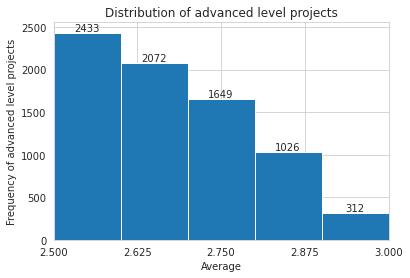

In [21]:
f, ax = plt.subplots(figsize=(6,4))
plt.hist(df_dr_snap_advanced["Average"], bins=5, range=(2.5, 3))
plt.bar_label(ax.containers[0])
x_left, x_right = ax.set_xlim(left=2.5, right=3)
ax.set_xticks(np.linspace(2.5, 3, 5))
plt.title("Distribution of advanced level projects")
plt.ylabel("Frequency of advanced level projects")
plt.xlabel("Average")

El nº de proyectos correspondientes a las máximas puntuaciones medias del nivel avanzado, continúan con la tendencia descendente del nivel anterior, encontrando el máximo nº de proyectos para este nivel en 2.5 puntos de puntuación media. Solamente 312 de un total de 113906 proyectos de Dr. Snap! logran conseguir los 3 puntos.  

In [22]:
level_statistics = df_dr_snap.groupby("Level")["Average"].agg([np.mean,np.median, np.var, np.std])
level_statistics

mean  median       var       std
Level                                             
Advanced      2.661773   2.625  0.021579  0.146899
Basic         1.031940   1.000  0.067553  0.259909
Intermediate  1.819358   1.750  0.071776  0.267911
No level      0.208214   0.125  0.012769  0.113000

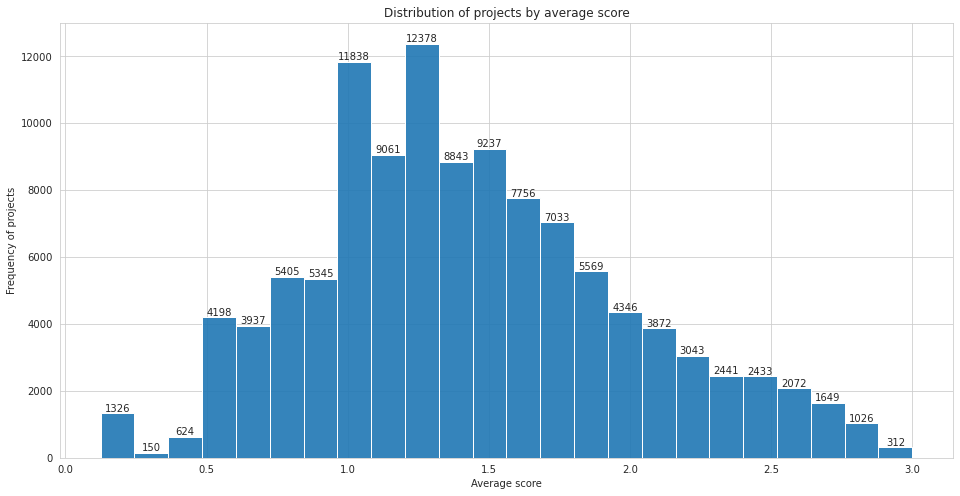

In [23]:
df_total=[df_dr_snap_no_level, df_dr_snap_basic, df_dr_snap_intermediate, df_dr_snap_advanced]
result = pd.concat(df_total)
f, ax = plt.subplots(figsize=(16,8))
ax = plt.gca()
sns.histplot(data=result, x="Average", bins=24, alpha=0.9)
plt.bar_label(ax.containers[0])
plt.title("Distribution of projects by average score")
plt.ylabel("Frequency of projects")
plt.xlabel("Average score")
plt.show()

Se representa el histograma donde se indica cuál es la cantidad de proyectos que alcanzan una determinada media aritmética, de entre las 24 posibles en un rango de (0,3). Tomando valores continuos la media es numerable. Las mayores frecuencias se consiguen para las puntuaciones medias de 1 y 1,25. Existe una concentración del nº de proyectos en torno a 1 y 1,75, disminuyendo según nos acercamos a los valores extremos del intervalo.

## Frecuencia de los proyectos por dimensiones del pensamiento computacional

Se analiza a continuación el nº de proyectos que consiguen determinada puntuación en cada una de las ocho dimensiones analizadas.

In [24]:
df_ct = df_dr_snap.loc[:, "Conditional":"Data"]

In [25]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113894 entries, 0 to 113893
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Conditional         113894 non-null  uint8
 1   Synchronization     113894 non-null  uint8
 2   Flow Control        113894 non-null  uint8
 3   Abstraction         113894 non-null  uint8
 4   Parallelism         113894 non-null  uint8
 5   Diversity           113894 non-null  uint8
 6   User Interactivity  113894 non-null  uint8
 7   Data                113894 non-null  uint8
dtypes: uint8(8)
memory usage: 889.9 KB


In [26]:
df_score_ct = pd.DataFrame(index=df_dr_snap["Score"].sort_values().unique().tolist())
for column in df_ct.columns:
    df_score_ct[column] = df_ct.groupby([column]).size().to_frame()
if 0 in df_score_ct.columns:
    df_score_ct.reset_index(drop=True, inplace=True)
    df_score_ct.drop(0, 1, inplace=True)
df_score_ct

Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
0        73670            63945          8707        14084        40185   
1        11387            17487         41754        20918        28898   
2        12620            19553         47217        22563        18770   
3        16217            12909         16216        56329        26041   

   Diversity  User Interactivity   Data  
0        NaN               19085  18531  
1    20586.0               42289  53006  
2    79582.0               25767  23269  
3    13726.0               26753  19088

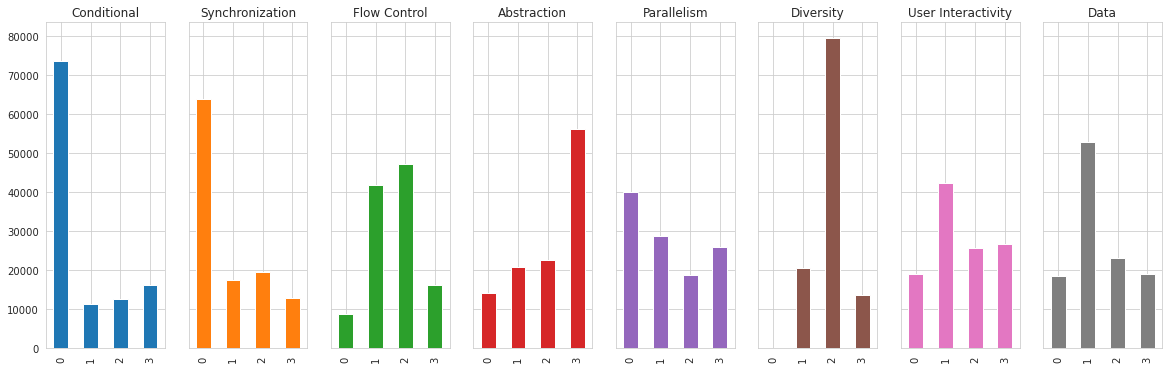

In [27]:
df_score_ct.plot(kind='bar', subplots=True, layout=(1,8), legend=False,figsize=(20, 6), sharey=True);

Según estos diagramas de barras los peores resultados se obtienen en el uso de condicionales para ejecutar unos bloques u otros y en sincronización entre programas del proyecto mediante eventos, donde 73670 y 63945 proyectos respectivamente no puntúan. En control de flujo, que valora la ejecución de los bloques en el orden adecuado así como la utilización de bucles, las puntuaciones están más centradas en torno a 1 y 2 puntos. En abstracción, que es la capacidad de dividir el problema en tareas a realizar o scripts que las resuelvan más sencillas, prácticamente la mitad de los proyectos consiguen 3 puntos, pues emplean bloques implementados por el programador. En paralelismo que es la realización de varias tareas o scripts al mismo tiempo o la ejecución del mismo script por varios personajes, el nº de proyectos asignados a cada puntuación desciende de 0 a 2 para incrementarse al pasar a 3 puntos. Todos los proyectos de Dr. Snap analizados tienen al menos un punto de diversidad. Esto indica que todos los proyectos cuentan con bloques con alguna de estas categorías (motion, looks, sound, pen, control, sensing, operators, variables). La mayoría de los programas de Dr. Snap! reúnen bloques de entre 3 y 6 de estas categorías, por lo que se asignan 2 puntos. Se suelen especificar los atributos de los personajes, de modo que en representación de los datos se consigue con mayor frecuencia 1 punto, estando el resto de puntuaciones más repartidas. En interactividad con el usuario se sigue una distribución similar, aunque exista un menor nº de proyectos con 1 punto y mayor cantidad de proyectos de Dr. Snap! repartidos en el resto de dimensiones.

## Análisis estadístico general de las 8 dimensiones analizadas.

Se observa que las mayores medias son para abstracción y diversidad y las menores son para uso de condicionales y sincronización. Las habilidades con menor dispersión son diversidad y control de flujo, como se concluye a partir de la desviación típica y los valores de los cuartiles. La desviación típica toma para el resto de valores un valor elevado, en torno a 1, por lo que la mediana de cada dimensión será más representativa que la media. Se observan también los cuartiles que serán estudiados con mayor detalle en el diagrama de cajas. El percentil 50 o 2º cuartil coincide con la mediana.

In [28]:
df_ct.describe()

Conditional  Synchronization   Flow Control    Abstraction  \
count  113894.000000    113894.000000  113894.000000  113894.000000   
mean        0.748749         0.836919       1.622877       2.063594   
std         1.124307         1.076988       0.820097       1.081128   
min         0.000000         0.000000       0.000000       0.000000   
25%         0.000000         0.000000       1.000000       1.000000   
50%         0.000000         0.000000       2.000000       2.000000   
75%         2.000000         2.000000       2.000000       3.000000   
max         3.000000         3.000000       3.000000       3.000000   

         Parallelism      Diversity  User Interactivity           Data  
count  113894.000000  113894.000000       113894.000000  113894.000000  
mean        1.269259       1.939769            1.528456       1.376789  
std         1.166067       0.545562            1.026705       0.946268  
min         0.000000       1.000000            0.000000       0.000000  
25%         0.000000       2.000000            1.000000       1.000000  
50%         1.000000       2.000000            1.000000       1.000000  
75%         2.000000       2.000000            2.000000       2.000000  
max         3.000000       3.000000            3.000000       3.000000

In [29]:
df_ct.median()

Conditional           0.0
Synchronization       0.0
Flow Control          2.0
Abstraction           2.0
Parallelism           1.0
Diversity             2.0
User Interactivity    1.0
Data                  1.0
dtype: float64

Es destacable que la mitad de los proyectos tengan 0 puntos en el uso de condicionales y sincronismo. A los usuarios de Dr. Snap! no les resulta tan fácil establecer condiciones para ejecutar unas instrucciones u otras, o hacer que los flujos de código se ejecuten siguiendo cierto orden temporal establecido.

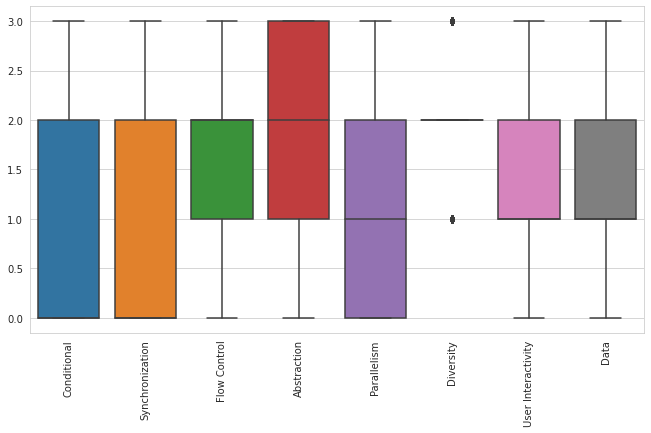

In [30]:
sns.boxplot(data=df_ct)
plt.xticks(rotation=90);

- **Uso de condicionales y sincronismo:** tienen una distribución parecida, de modo que por debajo de la mediana todos los proyectos tienen un valor de 0, alcanzando en el tercer cuartil los dos puntos, de manera que el 75 % de los proyectos ordenados de menor a mayor puntuación, tienen 0,1 o incluso 2 puntos. El menor valor de la media se consigue en estas habilidades, ya que como se ve en la distribución de proyectos los proyectos con 0 puntos son los más frecuentes. La mediana y el primer cuartil valen 0 y el rango intercuartílico es de 2. El límite superior de valores está en 3.
- **Control de flujo:** los proyectos ordenados de menor a mayor puntuación tienen para el primer cuartil 1 punto, alcanzando los 2 puntos para el segundo cuartil o mediana y para el tercer cuartil. Los valores están más concentrados entre 1 y 2.
- **Abstracción:** el primer cuartil se sitúa en 1 punto y en el segundo cuartil, que coincide siempre con la mediana, alcanza el valor de 2 puntos. Es la única dimensión del pensamiento computacional donde en el tercer cuartil se obtienen 3 puntos. 
- **Paralelismo:** El 25% de los proyectos están en 0 puntos. El 50% de los proyectos alcanzan 1 punto, y para el tercer cuartil, el 75% de los proyectos consiguen 2 puntos. El límite superior está en 3 puntos.
- **Diversidad:** El primer cuartil, mediana y tercer cuartil, están en los dos puntos, por lo que las puntuaciones de los proyectos están concentrados en torno a ese valor, considerándose atípicas las puntuaciones de 1 y 3 puntos. No hay proyectos con 0 puntos.
- **Interactividad con el usuario y representación de los datos:** Siguen una distribución similar, donde existe un límite inferior en 0 puntos, el 25% de los proyectos ordenados de menor a mayor puntuación consiguen alcanzar 1 punto. La mitad de los proyectos están entre 0 y 1 punto. El tercer cuartil se localiza en los 2 puntos.

Text(0.5, 1.0, 'Correlation between 8 CT')

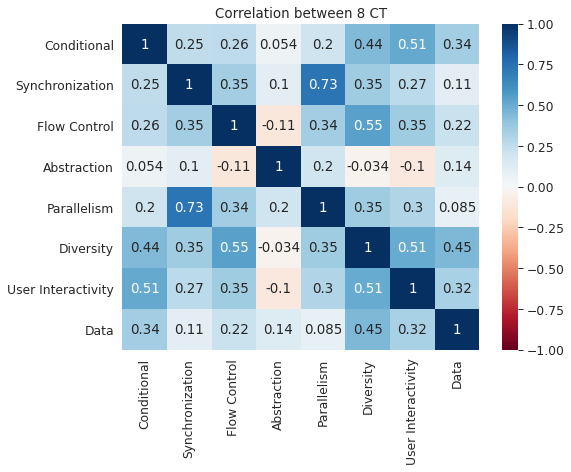

In [31]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
corr_matrix= df_ct.corr(method='pearson')
sns.heatmap(corr_matrix, annot= True, cmap='RdBu', vmin=-1, vmax=1)
plt.title("Correlation between 8 CT")

Existe una correlación positiva fuerte entre paralelismo y sincronismo, ya que si en un proyecto de Dr. Snap! se ejecutan distintos flujos de código en el mismo momento se necesitan mecanismos que los ajusten en el tiempo.  Resulta bastante extraño que no exista dependencia lineal entre abstracción y el resto de habilidades consideradas, pues la capacidad demostrada en el proyecto de dividir el problema en scripts más sencillos que facilite su depuración y el control de errores, debería estar relacionado con emplear condiciones para ver que secuencia de bloques ejecutar, con seguir una secuencia de bloques ordenada o utilizar bucles para controlar el flujo del programa, con establecer eventos para que distintos programas se ejecuten en el orden adecuado o de manera simultánea o con conocer y aplicar los diferentes tipos de bloques para que el código sea preciso y conciso.

## Frecuencias y correlaciones de las 8 dimensiones según nivel y puntuación media

Se muestra en este apartado el nº de proyectos que consiguen determinadas puntuaciones en cada una de las 8 áreas del pensamiento computacional que se analizan en los proyectos de Dr. Snap, esta vez desglosadas según el nivel o puntuación equivalente. También se analiza se existe alguna dependencia lineal entre ellas, a partir de la correlación. Las equivalencias entre puntuaciones medias, puntuación total y nivel asignados son:
- [0, 0.5) --> Sin nivel --> puntuación 0.
- [0.5, 1.5) --> Básico --> puntuación 1.
- [1.5, 2.5) --> Intermedio --> puntuación 2.
- [2.5, 3) --> Avanzado --> puntuación 3.

In [32]:
ct = df_ct.columns.values.tolist()
def df_distrib_score(x, ct):
    return df_total_group.get_group(x).filter(ct)

In [33]:
def df_correlation_bar_chart(score, ct):
    print("--> Score:", score) #, " --> Level: ", list_level[score])
    df = df_distrib_score(score, ct).iloc[:, :].apply(pd.value_counts).fillna(0)
    df.T.plot.bar(align = 'center', color={0: "grey", 1: "red", 2:"orange", 3:"blue"}, alpha=0.8)
    plt.legend(loc=(1.04,0))
    title = "Distribution of skills CT with score=" + str(score)
    ylabel= "Nº of projects with score=" + str(score)
    plt.title(title)
    plt.ylabel(ylabel)
    display(df_distrib_score(score,ct))
    plt.show()
    df_corr_3_valid = df.corr()
    not_validate = df_corr_3_valid.isnull().values.any()
    if score == 3 and not_validate:  
        print("Desviación típica de cada dimensión del pensamiento computacional")
        display(df.std())
        print("Matriz de correlación entre las 8 dimensiones para la puntuación 3")
        display(df.corr())
    else:
        print("Matriz de correlación entre las 8 dimensiones para la puntuación", score)
        #display(df.corr())
        sns.heatmap(df.corr(), annot= True, cmap='RdBu', vmin=-1, vmax=1)
        plt.show()               

In [34]:
total_score = df_dr_snap["Score"].sort_values().unique().tolist()
list_level = ["No level", "Basic", "Intermediate", "Advanced"]
df_total_group = df_dr_snap.groupby("Score")
total_score

[0, 1, 2, 3]

--> Score: 0


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
142               0                0             0            0            0   
163               0                0             0            0            0   
183               0                0             0            0            0   
218               0                0             0            0            0   
284               0                0             1            0            0   
...             ...              ...           ...          ...          ...   
113541            0                0             0            0            0   
113721            0                0             0            0            0   
113759            0                0             1            0            0   
113766            0                0             0            0            0   
113835            0                0             0            0            0   

        Diversity  User Interactivity  Data  
142             1                   0     0  
163             1                   0     0  
183             1                   0     0  
218             1                   0     0  
284             1                   0     1  
...           ...                 ...   ...  
113541          1                   0     0  
113721          1                   0     0  
113759          1                   0     0  
113766          1                   0     0  
113835          1                   0     0  

[2100 rows x 8 columns]

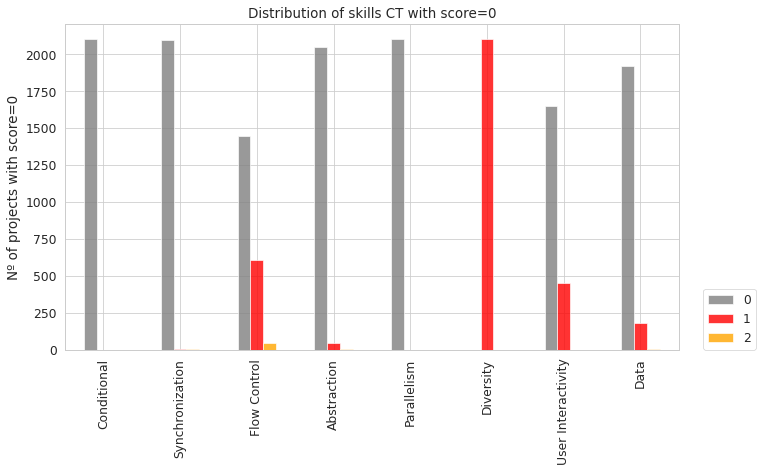

Matriz de correlación entre las 8 dimensiones para la puntuación 0


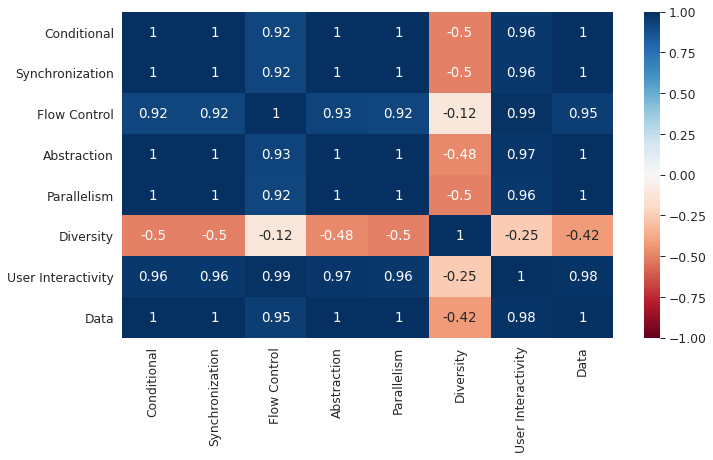

--> Score: 1


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
1                 0                1             2            1            1   
2                 1                0             2            1            0   
3                 0                0             1            3            0   
4                 0                0             0            3            1   
5                 0                0             2            1            1   
...             ...              ...           ...          ...          ...   
113871            0                0             1            3            0   
113873            0                0             0            3            2   
113881            0                0             1            3            2   
113886            0                0             1            3            1   
113891            0                0             3            3            1   

        Diversity  User Interactivity  Data  
1               2                   1     1  
2               2                   3     1  
3               2                   0     1  
4               1                   2     0  
5               2                   1     1  
...           ...                 ...   ...  
113871          2                   1     1  
113873          1                   1     0  
113881          1                   2     0  
113886          2                   1     3  
113891          2                   1     1  

[61005 rows x 8 columns]

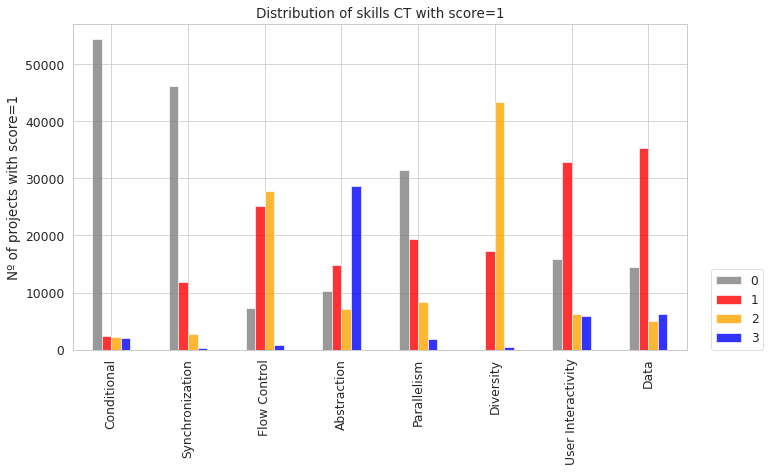

Matriz de correlación entre las 8 dimensiones para la puntuación 1


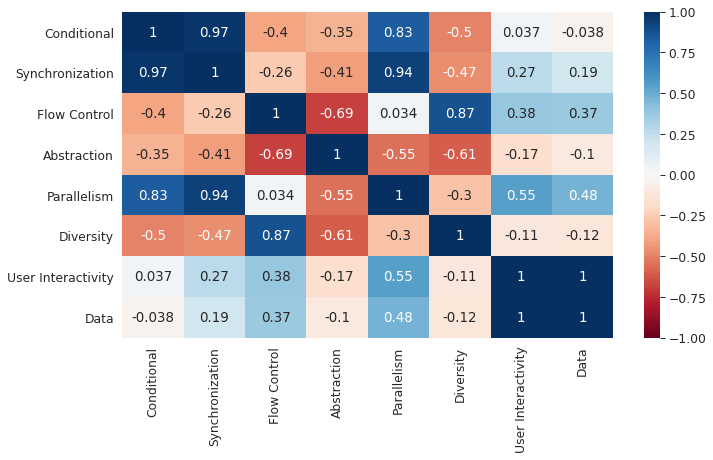

--> Score: 2


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
0                 0                2             1            3            3   
6                 3                0             2            3            2   
24                0                1             2            3            2   
25                3                3             1            3            3   
26                3                3             1            3            3   
...             ...              ...           ...          ...          ...   
113884            0                3             1            3            3   
113888            0                2             2            2            3   
113890            0                3             1            3            3   
113892            0                0             2            3            2   
113893            1                0             2            2            2   

        Diversity  User Interactivity  Data  
0               2                   0     1  
6               2                   2     1  
24              2                   1     1  
25              2                   3     0  
26              2                   3     0  
...           ...                 ...   ...  
113884          2                   1     2  
113888          2                   2     1  
113890          2                   1     1  
113892          2                   1     2  
113893          2                   2     1  

[43297 rows x 8 columns]

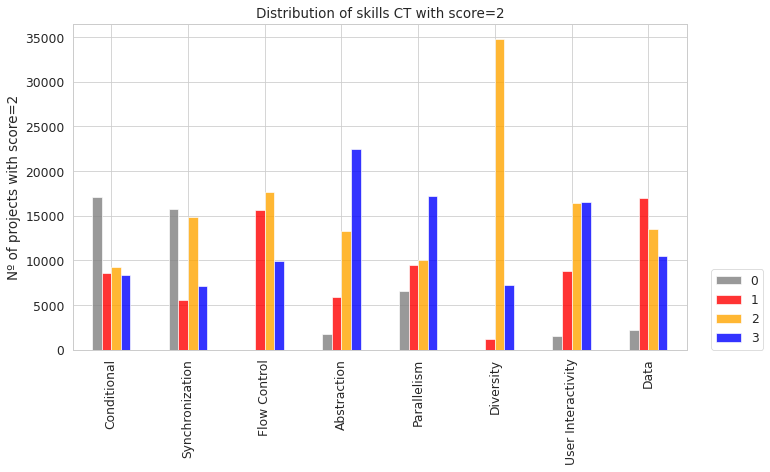

Matriz de correlación entre las 8 dimensiones para la puntuación 2


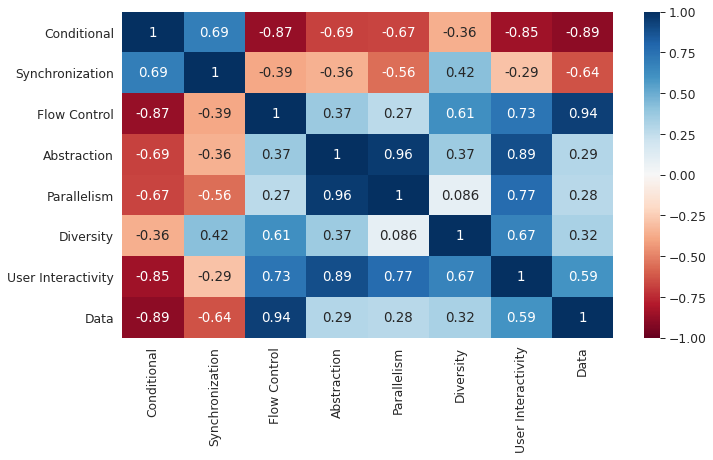

--> Score: 3


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
21                2                3             2            3            3   
74                3                3             3            3            3   
75                3                3             3            3            3   
85                2                3             2            2            3   
91                2                3             2            2            3   
...             ...              ...           ...          ...          ...   
113879            3                3             2            2            3   
113882            3                3             3            2            3   
113885            3                2             2            3            3   
113887            3                3             3            3            3   
113889            2                2             2            3            3   

        Diversity  User Interactivity  Data  
21              3                   1     3  
74              3                   2     2  
75              3                   3     2  
85              3                   3     3  
91              3                   3     3  
...           ...                 ...   ...  
113879          3                   3     2  
113882          2                   2     2  
113885          3                   3     2  
113887          2                   2     1  
113889          3                   3     2  

[7492 rows x 8 columns]

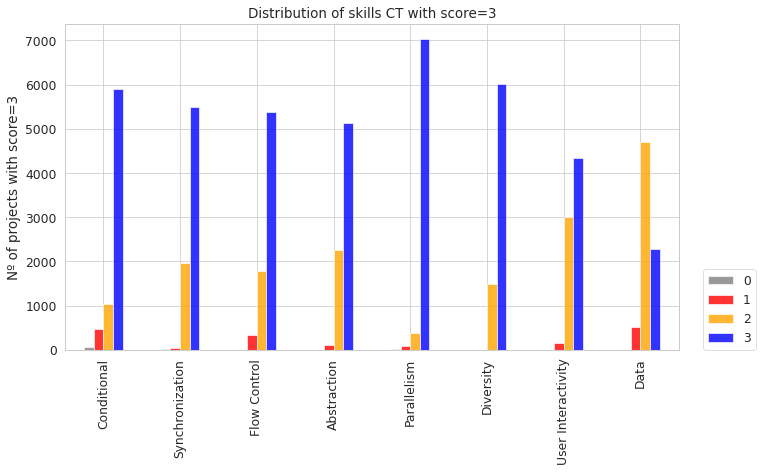

Matriz de correlación entre las 8 dimensiones para la puntuación 3


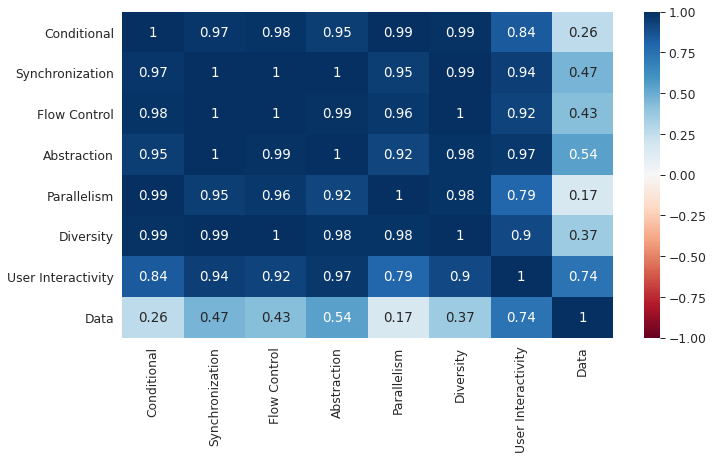

In [35]:
for score in total_score: 
    df_correlation_bar_chart(score, ct)
#df_correlation_bar_chart(0, ct)

- **Para la puntuación de 0 o proyectos sin nivel**: Se agrupan las puntuaciones medias de 0 a 0.5, considerando que estos proyectos apenas consiguen puntuación, por lo que se redondea a 0 y se le asigna la categoría "No level". Como se puede ver en el diagrama de barras la mayoría de los proyectos tienen 1 punto en diversidad, y algunos de ellos tienen 1 punto en control de flujo y en interactividad con el usuario. En la matriz de correlación se observan dependencias lineales moderadas en sentido negativo entre diversidad y el resto de dimensiones, siendo más próximas a 0 en los aspectos del pensamiento computacional donde algunos de los proyectos poseen 1 punto, y dando a entender que no existe dependencia lineal entre ellas. Para cada par del resto de dimensiones se obtiene una correlación positiva perfecta o casi perfecta.
  

- **Para la puntuación de 1 o proyectos de nivel básico**: En el diagrama de barras se distingue que diversidad consigue 2 puntos para la mayoría de proyectos de este nivel, control de flujo reparte los proyectos entre 1 y 2 puntos según el programa siga una estructura secuencial o emplee algún bucle, en abstracción la mitad de los proyectos consiguen 3 puntos, y gran parte de ellos tienen 1 punto en representación de los datos y en interactividad con el usuario. Las peores resultados son para uso de condicionales, sincronismo y paralelismo. 

  La matriz de correlación muestra que existe dependencia lineal casi perfecta en sentido positivo entre sincronización y uso de condicionales, en parte debido a que ambos aspectos del pensamiento computacional tienen 0 puntos para la mayoría de los proyectos. También existe una correlación positiva casi perfecta entre sincronismo y paralelismo, pudiendo ejecutar distintos flujos de código en el mismo momento, y una correlación elevada en sentido positivo entre paralelismo y uso de condicionales, resultando extraño, ya que la ejecución de distintos bloques en función de una condición no tendría que estar relacionada con la ejecución de distintos conjuntos de bloques de instrucciones en hilos diferentes, y entre control de flujo y diversidad, indicando que usar distintas categorías de bloques influye en las nociones algorítmicas mostradas en el programa de Dr. Snap! No existe correlación o dependencia lineal entre paralelismo y control de flujo, ni entre uso de condicionales con representación de los datos y con interactividad con el usuario. Se da una correlación negativa moderada entre abstracción con las siguientes tres dimensiones: diversidad, paralelismo y control de flujo. A mayor capacidad presente el proyecto para separar la solución del problema en conjuntos de instrucciones más sencillos, menores son las capacidades para emplear diversas categorías de bloques, para ejecutar distintos scripts en paralelo, o para ordenar las instrucciones de manera secuencial o mediante el uso de bucles. El hecho de que aumente el valor de la abstracción no debería provocar la disminución de las demás.
  
  
- **Para la puntuación de 2 o proyectos de nivel intermedio**: En el diagrama de barras, se puede distinguir una mayor cantidad de proyectos utilizando condicionales y sincronismo, estando las puntuaciones más repartidas entre 1, 2 y 3 puntos, aunque sigue existiendo una elevada cantidad de proyectos con 0 puntos. En control de flujo se consiguen puntuaciones variadas según se use una estructura de bloques secuencial (1 punto) o se empleen bucles sin o con condición de parada (2 y 3 puntos). En abstracción predominan los 3 puntos sobre las demás correspondientes a la definición de bloques por el programador. En diversidad se concentran en 2 puntos, que suponen utilizar entre 3 y 6 tipos distintos de bloques. En paralelismo, interactividad con el usuario y representación de los datos, cada vez hay mayor cantidad de proyectos con 2 y 3 puntos.

  Entre representación de los datos, ya sea con listas, variables y otros atributos de los personajes, y control de flujo según siga una estructura secuencial de bloques o realice la gestión de bucles, existe una correlación casi perfecta, aunque a priori no parezca existir dependencia entre ambas. También se da una correlación de este tipo entre paralelismo y abstracción de modo que cuando se divide la resolución del problema en scripts más sencillos se mejora en la capacidad de realizar scripts para su ejecución en paralelo. Si aumenta abstracción, aumenta la interactividad con el usuario, según su coeficiente de correlación, aunque en la práctica no tendría que ser así. Interactividad con el usuario también se relaciona fuertemente en sentido positivo con: control de flujo, paralelismo y diversidad. No existe dependencia lineal entre paralelismo y diversidad, ya que el uso de distintos tipos de bloques no se relaciona con la capacidad de poder realizar varios flujos de bloques en paralelo. Existe una correlación negativa elevada entre interactividad del usuario con condicionales, pero el aumento en el uso de condiciones no debería afectar en que disminuya la gestión de los distintas acciones que realice el usuario sobre el programa. También existe una elevada correlación en sentido negativo entre representación de los datos con el uso de condicionales, y entre esta última con control de flujo, de forma que al emplear condiciones tendría que disminuir la correcta utilización de bucles o el adecuado tratamiento de las variables, listas o atributos.
  
  
- **Para la puntuación de 3 o nivel avanzado**: En el diagrama de barras se manifiesta que prácticamente en todas las dimensiones gran nº de proyectos consiguen una puntuación de 3, salvo en representación de los datos. En la matriz de correlación se manifiesta este hecho, puesto que todas las dimensiones se relacionan linealmente con las demás, presentando coeficientes de correlación en sentido positivo muy elevados, salvo en el caso de representación de los datos con condicionales, sincronización, control de flujo, paralelismo y diversidad.

Ahora se va más al detalle, viendo cómo se reparten las puntuaciones de las distintas capacidades del pensamiento computacional para cada una de las puntuaciones medias.

In [36]:
ct = df_ct.columns.values.tolist()
total_average = df_dr_snap["Average"].sort_values().unique().tolist()
df_total_group = df_dr_snap.groupby("Average")

In [37]:
total_average

[0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 1.125,
 1.25,
 1.375,
 1.5,
 1.625,
 1.75,
 1.875,
 2.0,
 2.125,
 2.25,
 2.375,
 2.5,
 2.625,
 2.75,
 2.875,
 3.0]

--> Score: 0.125


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
142               0                0             0            0            0   
163               0                0             0            0            0   
183               0                0             0            0            0   
218               0                0             0            0            0   
317               0                0             0            0            0   
...             ...              ...           ...          ...          ...   
113347            0                0             0            0            0   
113541            0                0             0            0            0   
113721            0                0             0            0            0   
113766            0                0             0            0            0   
113835            0                0             0            0            0   

        Diversity  User Interactivity  Data  
142             1                   0     0  
163             1                   0     0  
183             1                   0     0  
218             1                   0     0  
317             1                   0     0  
...           ...                 ...   ...  
113347          1                   0     0  
113541          1                   0     0  
113721          1                   0     0  
113766          1                   0     0  
113835          1                   0     0  

[1326 rows x 8 columns]

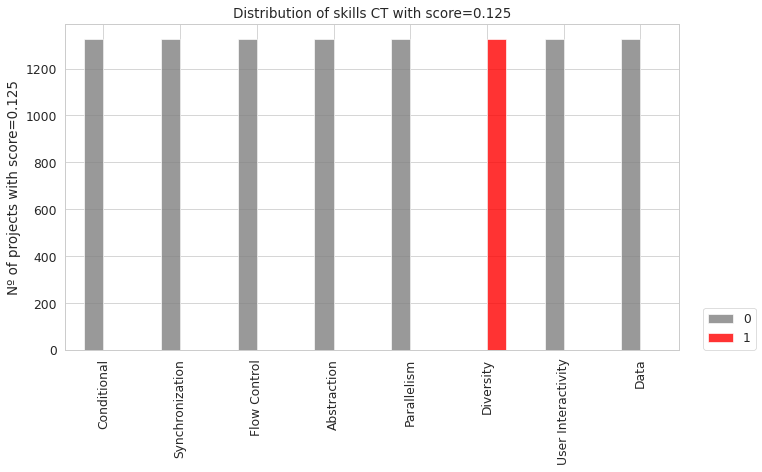

Matriz de correlación entre las 8 dimensiones para la puntuación 0.125


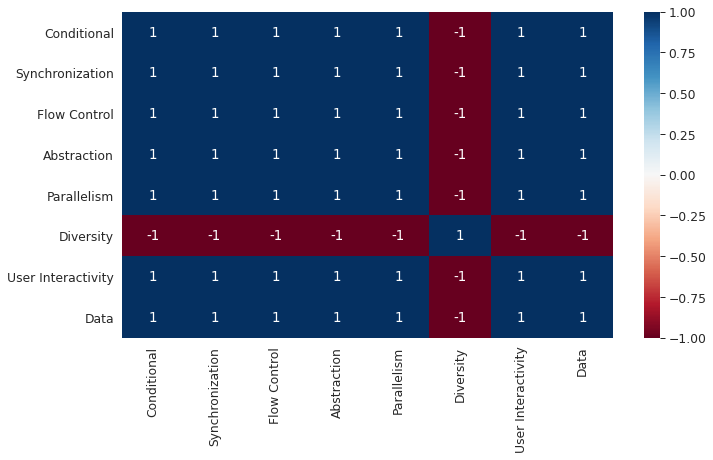

In [38]:
df_correlation_bar_chart(0.125, ct)

- Para la puntuación media de 0.125: los 1326 proyectos tienen un valor de diversidad de 1 punto. El resto de dimensiones están a 0 puntos. Por ello obtenemos esta matriz de correlación, con correlaciones perfectas  positivas entre cada par de dimensiones, salvo en diversidad con el resto de dimensiones, donde es perfecta negativa.

--> Score: 0.25


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
1184              0                0             0            0            0   
1600              0                0             1            0            0   
7186              0                0             0            1            0   
8292              0                0             0            0            0   
9613              0                0             0            1            0   
...             ...              ...           ...          ...          ...   
110397            0                0             0            1            0   
112844            0                0             1            0            0   
113336            0                0             1            0            0   
113345            0                0             1            0            0   
113759            0                0             1            0            0   

        Diversity  User Interactivity  Data  
1184            1                   0     1  
1600            1                   0     0  
7186            1                   0     0  
8292            1                   0     1  
9613            1                   0     0  
...           ...                 ...   ...  
110397          1                   0     0  
112844          1                   0     0  
113336          1                   0     0  
113345          1                   0     0  
113759          1                   0     0  

[150 rows x 8 columns]

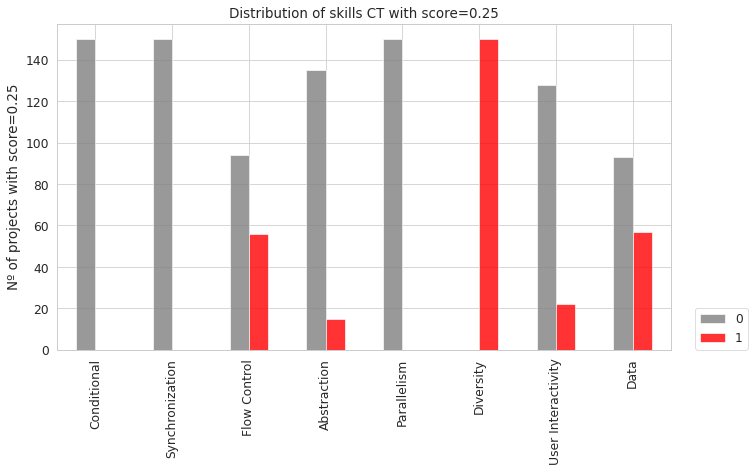

Matriz de correlación entre las 8 dimensiones para la puntuación 0.25


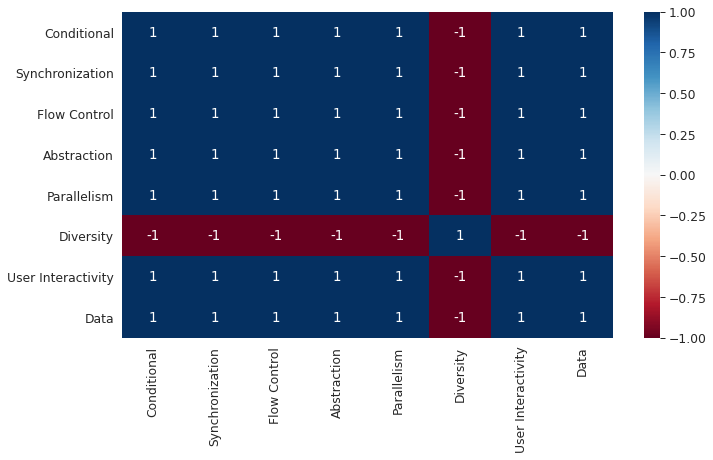

In [39]:
df_correlation_bar_chart(0.25, ct)

- Para la puntuación media de 0.25: La diversidad se mantiene en un punto para los 150 proyectos con esta puntuación media. El otro punto se reparte entre control de flujo, representación de los datos y en menor medida entre interactividad con el usuario y abstracción. La matriz de correlación es exactamente la misma que en la puntuación media anterior.

--> Score: 0.375


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
284               0                0             1            0            0   
1393              0                0             1            0            0   
1610              0                0             1            0            0   
1897              0                0             1            0            0   
1953              0                0             1            0            0   
...             ...              ...           ...          ...          ...   
110813            0                0             1            0            0   
111849            0                0             1            0            0   
111891            0                0             1            0            0   
111937            0                0             1            0            0   
111942            0                0             1            0            0   

        Diversity  User Interactivity  Data  
284             1                   0     1  
1393            1                   1     0  
1610            1                   1     0  
1897            1                   1     0  
1953            1                   1     0  
...           ...                 ...   ...  
110813          1                   1     0  
111849          1                   1     0  
111891          1                   0     1  
111937          1                   1     0  
111942          1                   0     1  

[624 rows x 8 columns]

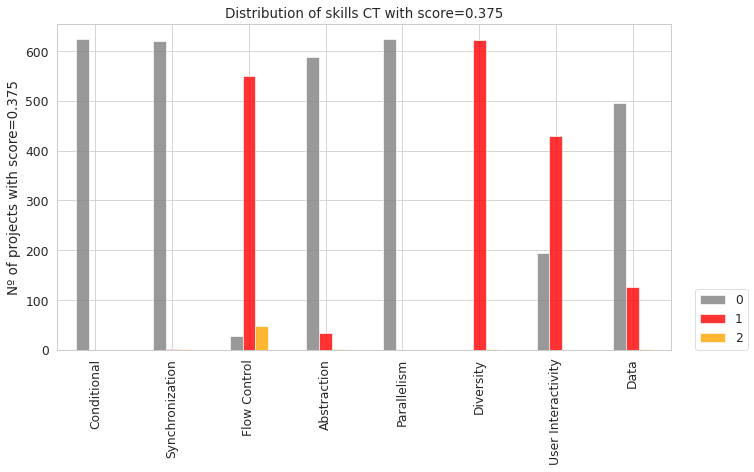

Matriz de correlación entre las 8 dimensiones para la puntuación 0.375


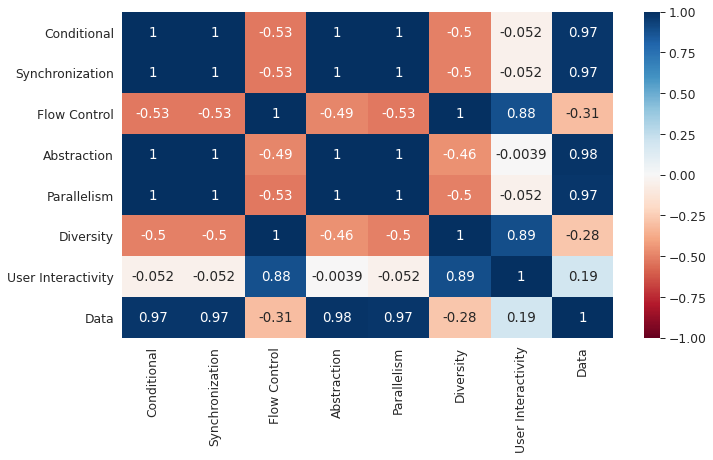

In [40]:
df_correlation_bar_chart(0.375, ct)

- Para la puntuación media de 0.375: los proyectos de Dr. Snap! puntúan en control de flujo, interactividad con el usuario y diversidad.
  La matriz de correlación presenta correlaciones positivas elevadas o perfectas entre cada par de estas dimensiones. Control de flujo y diversidad tienen una correlación moderada en sentido negativo con el resto de destrezas del pensamiento computacional, mientras que interactividad con el usuario no tiene dependencia lineal con el resto de estas dimensiones que no puntúan. Dichas dimensiones presentan entre sí una correlación en sentido positivo casi perfecta o perfecta.

--> Score: 0.5


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
125               0                0             0            3            0   
135               0                0             1            0            0   
155               0                0             0            3            0   
189               0                0             0            3            0   
205               0                0             0            3            0   
...             ...              ...           ...          ...          ...   
113754            0                0             0            3            0   
113757            0                0             0            3            0   
113802            0                0             0            3            0   
113834            0                0             0            3            0   
113840            0                0             0            3            0   

        Diversity  User Interactivity  Data  
125             1                   0     0  
135             1                   1     1  
155             1                   0     0  
189             1                   0     0  
205             1                   0     0  
...           ...                 ...   ...  
113754          1                   0     0  
113757          1                   0     0  
113802          1                   0     0  
113834          1                   0     0  
113840          1                   0     0  

[4198 rows x 8 columns]

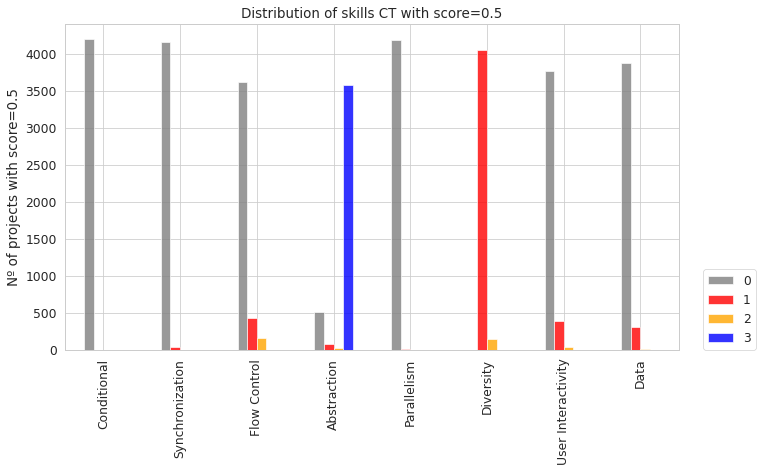

Matriz de correlación entre las 8 dimensiones para la puntuación 0.5


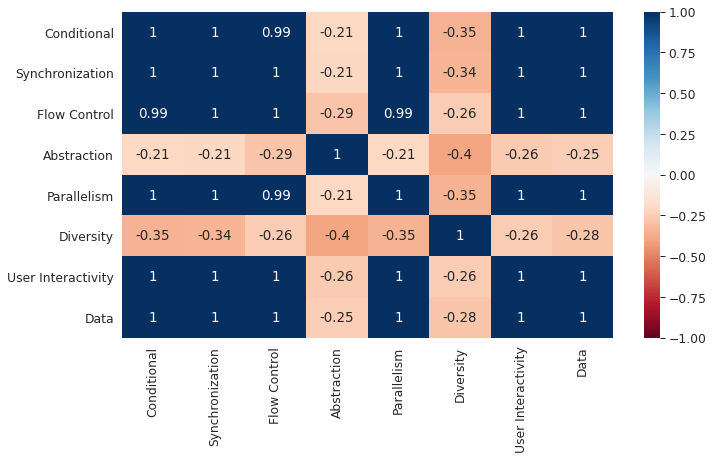

In [41]:
df_correlation_bar_chart(0.5, ct)

- Para la puntuación media de 0.5: En el diagrama de barras se observa que la mayor parte de los proyectos consiguen 3 puntos en abstracción y 1 punto en diversidad.
  
  La matriz de correlación presenta tanto en abstracción como en diversidad dependencias lineales débiles negativas con cada una de las otras 7 dimensiones. Se explica porque el resto de áreas del pensamiento computacional tienen un valor de 0 para la mayor parte los proyectos. Como en los casos anteriores, la correlación lineal es perfecta positiva entre cada par de dimensiones cuyo valor es 0. Entre diversidad y abstracción el coeficiente de correlación es moderado y negativo. La creación de bloques definidos por el usuario que resuelven el problema de una manera más sencilla evitando duplicar código, hace que se empleen menos categorías de bloques, según el valor obtenido de correlación.

--> Score: 0.625


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
11                0                0             0            3            0   
37                0                0             1            1            0   
38                0                0             0            3            0   
46                0                0             1            1            0   
223               0                0             0            3            0   
...             ...              ...           ...          ...          ...   
113806            0                1             1            0            0   
113861            0                0             0            3            0   
113862            0                0             0            3            0   
113863            0                0             0            3            0   
113870            0                0             0            3            0   

        Diversity  User Interactivity  Data  
11              1                   1     0  
37              2                   0     1  
38              1                   0     1  
46              2                   0     1  
223             1                   0     1  
...           ...                 ...   ...  
113806          1                   1     1  
113861          1                   1     0  
113862          1                   1     0  
113863          1                   1     0  
113870          1                   1     0  

[3937 rows x 8 columns]

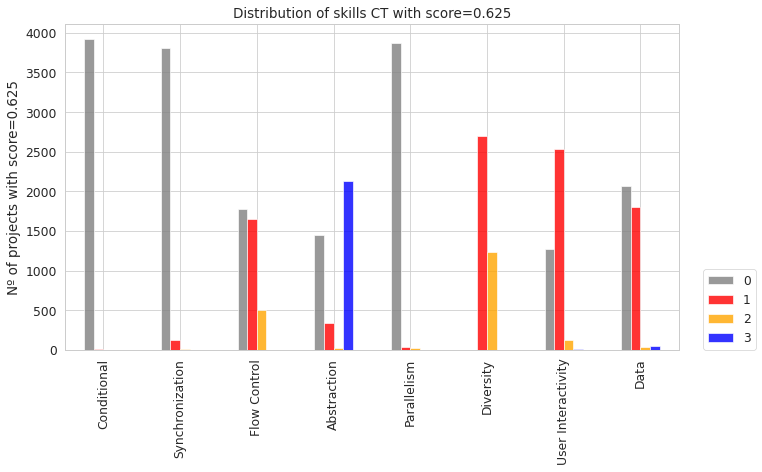

Matriz de correlación entre las 8 dimensiones para la puntuación 0.625


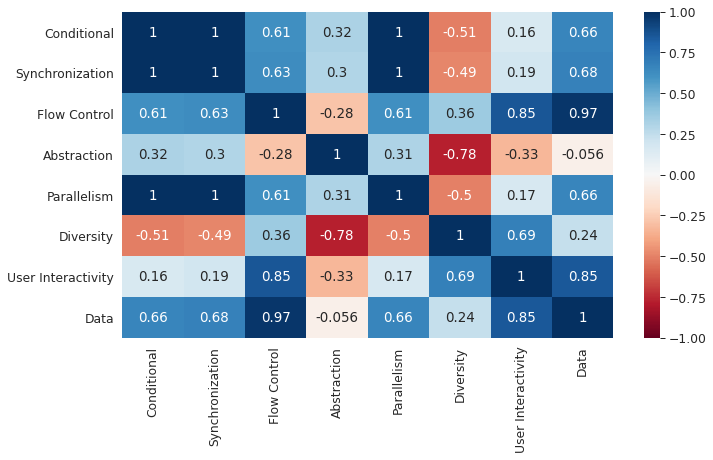

In [42]:
df_correlation_bar_chart(0.625, ct)

- Para la puntuación media de 0.625: aproximadamente la mitad de los proyectos consiguen 1 punto en control de flujo, interactividad con el usuario y representación de los datos. También la mitad de los proyectos mantienen 3 puntos en abstracción. En diversidad los proyectos se reparten entre los que tienen 1 punto y los que tienen 2 puntos.

  La correlación es positiva y perfecta entre las dimensiones cuya puntuación en los proyectos es de 0. Es elevada en sentido positivo entre interactividad del usuario con representación de los datos, aunque no exista aparentemente relación entre la declaración de atributos de los objetos con ofrecer al usuario que realice acciones sobre el programa, y entre control de flujo e interactividad con el usuario, de modo que cuando el proyecto de Dr. Snap! presenta una secuencia de instrucciones apropiada, también tiene en cuenta las situaciones provocadas por las acciones que el usuario realiza sobre él. Existe además una relación lineal positiva casi perfecta entre control de flujo y representación de los datos. No existe dependencia lineal entre interactividad con el usuario y uso de condicionales, sincronización y paralelismo. Tampoco se da esta dependencia lineal entre abstracción y representación de los datos. La correlación entre abstracción y diversidad es elevada en sentido negativo. Al crear bloques definidos por el programador y hacer scripts enfocados en resolver una tarea concreta tendría que disminuir el uso de distintas categorías de bloques, según indica la correlación.

--> Score: 0.75


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
12                0                0             0            3            0   
111               0                0             1            1            0   
123               0                0             1            3            0   
127               0                0             1            3            0   
132               0                0             1            0            0   
...             ...              ...           ...          ...          ...   
113701            0                0             0            3            1   
113712            0                0             1            3            0   
113736            0                0             0            3            1   
113830            0                0             0            3            1   
113843            0                0             0            3            0   

        Diversity  User Interactivity  Data  
12              1                   2     0  
111             1                   0     3  
123             1                   1     0  
127             1                   0     1  
132             2                   3     0  
...           ...                 ...   ...  
113701          1                   1     0  
113712          1                   0     1  
113736          1                   1     0  
113830          1                   1     0  
113843          1                   2     0  

[5405 rows x 8 columns]

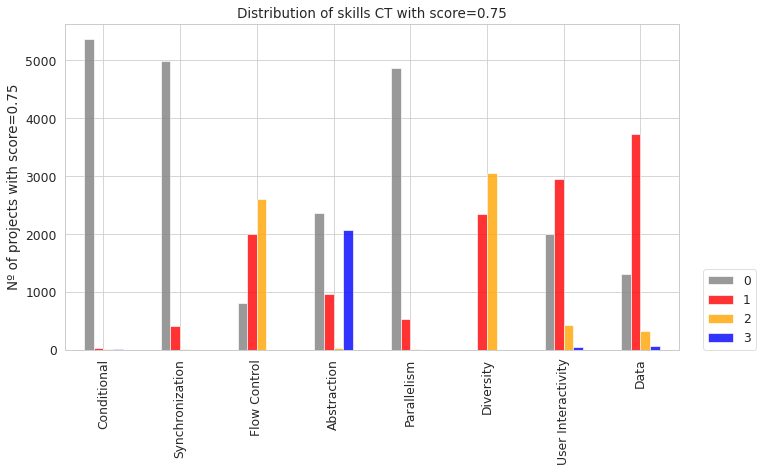

Matriz de correlación entre las 8 dimensiones para la puntuación 0.75


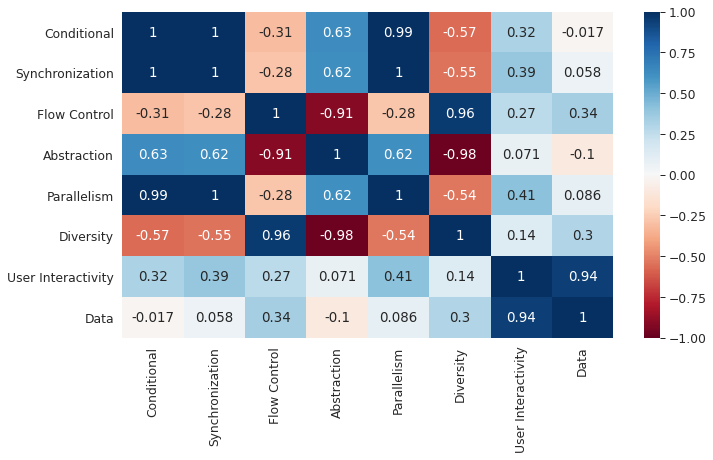

In [43]:
df_correlation_bar_chart(0.75, ct)

- Para la puntuación media de 0.75: En control de flujo y diversidad hay mayor cantidad de proyectos que en la puntuación media anterior que consiguen los 2 puntos.
  
  La matriz de correlación sigue mostrando una correlación perfecta positiva entre las dimensiones que se mantienen en 0 puntos, sincronización, uso de condicionales y paralelismo. Existe una correlación casi perfecta entre diversidad y control de flujo, de manera que al emplear condiciones en la estructura del programa aumenta la diversidad de bloques empleados. Se da este tipo de correlación entre interactividad con el usuario y representación de los datos, de modo que cuando el usuario presiona la bandera verde afectaría al uso de atributos en los personajes y esta relación no es evidente. No existe correlación entre representación de los datos con: condicionales, sincronización, paralelismo y abstracción. Tampoco existe dependencia lineal entre abstracción e interactividad con el usuario. Se dan correlaciones casi perfectas en sentido negativo, entre abstracción y control de flujo y entre abstracción y diversidad, de manera que al dividir la solución del problema en scripts sencillos, se reduce la capacidad del desarrollador para organizar su código de manera secuencial o con bucles, o para emplear bloques de diferentes tipos, relaciones que parecen contradictorias.

--> Score: 0.875


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
3                 0                0             1            3            0   
4                 0                0             0            3            1   
8                 0                0             0            3            1   
18                0                0             0            3            1   
58                0                1             2            0            0   
...             ...              ...           ...          ...          ...   
113774            0                0             1            3            1   
113812            0                0             1            1            1   
113844            0                0             0            3            1   
113856            0                1             2            0            0   
113873            0                0             0            3            2   

        Diversity  User Interactivity  Data  
3               2                   0     1  
4               1                   2     0  
8               1                   2     0  
18              1                   2     0  
58              2                   1     1  
...           ...                 ...   ...  
113774          1                   1     0  
113812          2                   1     1  
113844          1                   2     0  
113856          2                   1     1  
113873          1                   1     0  

[5345 rows x 8 columns]

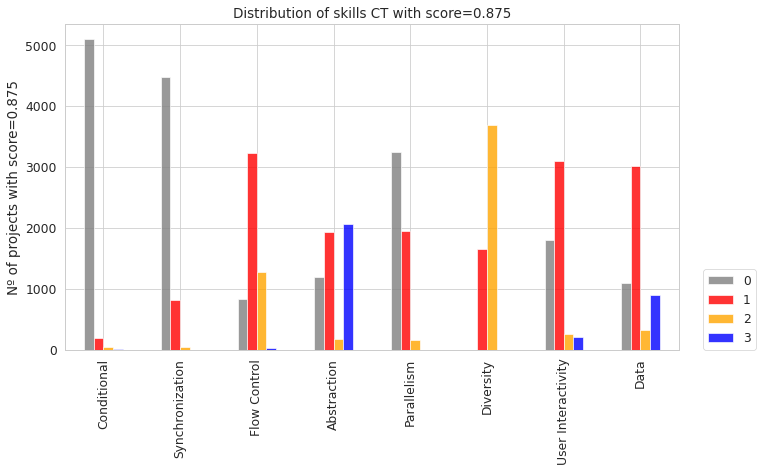

Matriz de correlación entre las 8 dimensiones para la puntuación 0.875


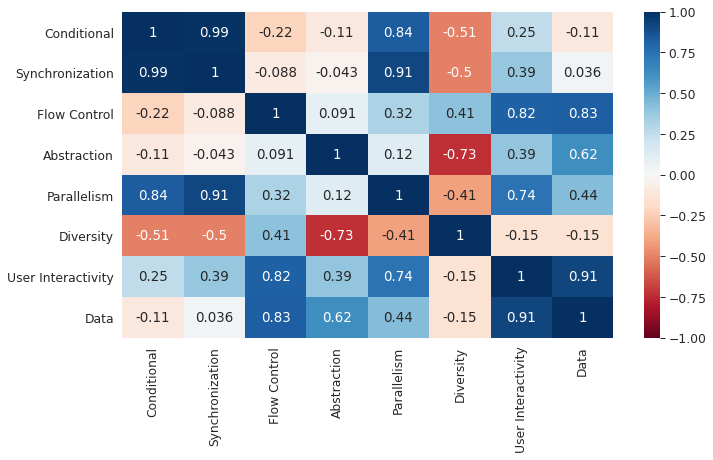

In [44]:
df_correlation_bar_chart(0.875, ct)

- Para la puntuación media de 0.875: La mayor parte de los proyectos de Dr. Snap! presentan una puntuación de 0 en el uso de condicionales, en sincronización y en paralelismo. En el resto de destrezas del pensamiento computacional prevalece el punto, salvo en abstracción donde hay gran cantidad de proyectos con 1 y 3 puntos, y en diversidad donde predominan los 2 puntos.

  La matriz de correlación tiene valores de dependencia lineal casi perfecta o bastante elevada entre aquellas áreas donde la mayoría de los proyectos mantienen su valor en 0, si bien va disminuyendo según aumenta la cantidad de proyectos con valor 1. Entre interactividad con el usuario y representación de los datos, interactividad con el usuario y control de flujo, y representación de los datos con control de flujo se da una alta dependencia lineal en sentido positivo, de modo que la capacidad de definir el programa secuencialmente o establecer bucles, depende de la declaración de variables, atributos y listas, facilitando la realización de operaciones con ellos, y de que el usuario interactúe con el programa presionando la bandera verde. No existe correlación entre control de flujo y sincronización, entre representación de los datos con condicionales y con sincronización y entre abstracción y las siguientes: condicionales, sincronización y control de flujo. Se da una correlación lineal elevada en sentido negativo, de modo que cuando aumenta una disminuye la otra, entre abstracción y diversidad.

--> Score: 1


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
5                 0                0             2            1            1   
15                0                0             2            1            1   
16                0                0             2            1            1   
22                0                0             2            1            1   
23                0                0             2            1            1   
...             ...              ...           ...          ...          ...   
113849            0                0             2            1            1   
113852            0                0             2            1            1   
113865            0                0             2            3            0   
113869            0                0             1            3            0   
113871            0                0             1            3            0   

        Diversity  User Interactivity  Data  
5               2                   1     1  
15              2                   1     1  
16              2                   1     1  
22              2                   1     1  
23              2                   1     1  
...           ...                 ...   ...  
113849          2                   1     1  
113852          2                   1     1  
113865          2                   0     1  
113869          2                   1     1  
113871          2                   1     1  

[11838 rows x 8 columns]

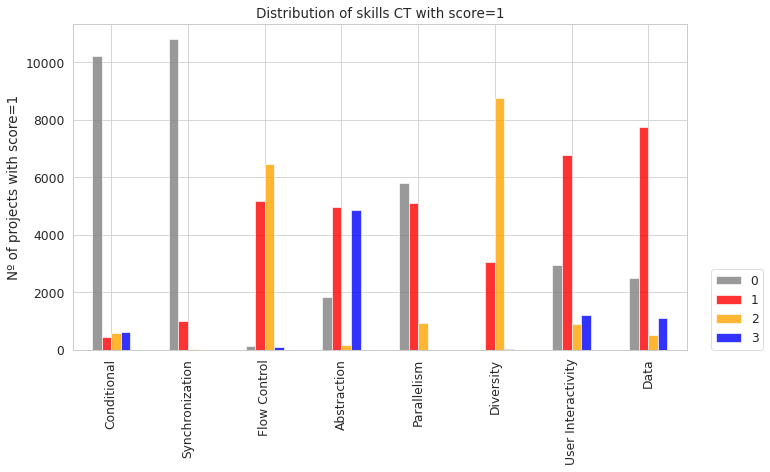

Matriz de correlación entre las 8 dimensiones para la puntuación 1


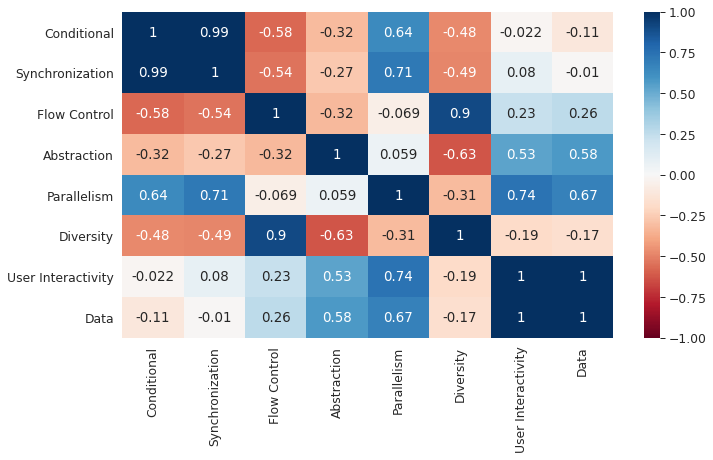

In [45]:
df_correlation_bar_chart(1, ct)

- Para la puntuación media de 1: Contando con el doble de proyectos que en la puntuación media anterior, las proporciones de proyectos para cada puntuación en cada dimensión son similares, salvo en control de flujo donde aumenta el nº de proyectos con 2 puntos, por el uso de bucles.

  En la matriz de correlación sigue existiendo una elevada correlación entre sincronización y condicionales, porque siguen valiendo 0. Se visualiza una correlación casi perfecta entre interactividad con el usuario y representación de los datos y entre diversidad y control de flujo, aun cuando que el usuario pulse bandera verde pueda parecer que no guarda relación con la declaración de atributos de los personajes y tampoco sea fácil establecer que el saber organizar el código secuencialmente o dónde es óptimo emplear bucles dependa de los distintos tipos de bloques empleados. No existe correlación entre paralelismo y control de flujo, ni entre paralelismo y abstracción, ni entre interactividad con el usuario con condicionales o con sincronización, ni entre representación de los datos con condicionales o con sincronización. La correlación en sentido negativo más remarcable es la que ocurre entre abstracción y diversidad, que también se produce en las puntuaciones medias anteriores.

--> Score: 1.125


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
1                 0                1             2            1            1   
19                0                1             2            3            0   
20                0                1             2            3            0   
27                0                0             1            3            1   
61                0                1             2            1            1   
...             ...              ...           ...          ...          ...   
113785            0                0             1            3            1   
113804            1                0             2            3            0   
113838            0                0             1            3            0   
113858            0                1             2            3            0   
113881            0                0             1            3            2   

        Diversity  User Interactivity  Data  
1               2                   1     1  
19              2                   0     1  
20              2                   0     1  
27              2                   1     1  
61              2                   1     1  
...           ...                 ...   ...  
113785          2                   1     1  
113804          2                   0     1  
113838          2                   1     2  
113858          1                   1     1  
113881          1                   2     0  

[9061 rows x 8 columns]

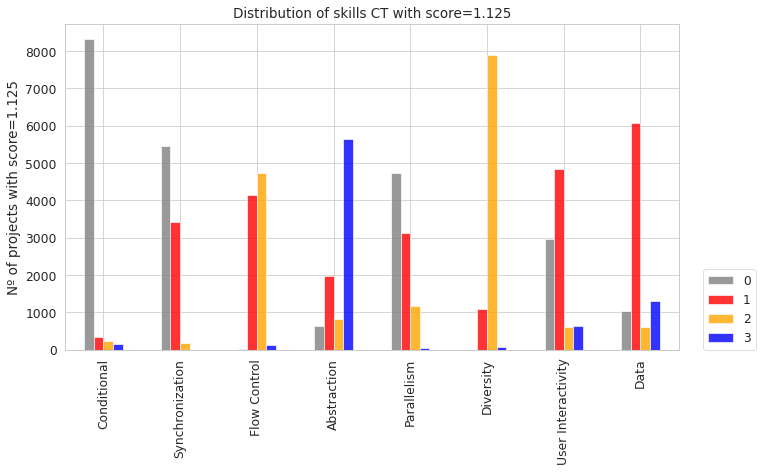

Matriz de correlación entre las 8 dimensiones para la puntuación 1.125


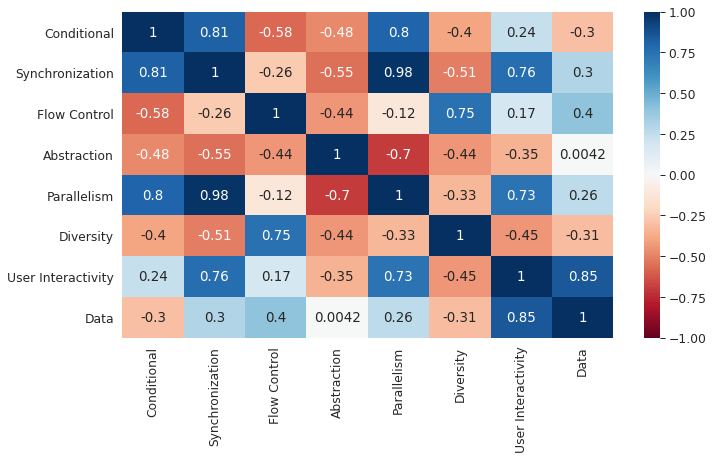

In [46]:
df_correlation_bar_chart(1.125, ct)

- Para la puntuación de 1.125: En el diagrama de barras, con respecto a la puntuación media anterior, los cambios a destacar son que más de un tercio de los proyectos consiguen 1 punto en sincronización, y que predomina la cantidad de proyectos con 3 puntos en abstracción y con 2 puntos en diversidad.

  En la matriz de correlación se consiguen los valores más elevados de correlación entre sincronización y condicionales, de modo que existe dependencia lineal entre la ejecución de sentencias en función de condiciones y hacer que las distintas sentencias se ejecuten según un orden temporal; entre paralelismo y condicionales, de forma que el hecho de que se ejecuten varios scripts simultáneamente depende de que se empleen condicionales, aunque no parezca que guarden relación; entre paralelismo y sincronización, ejecutándose varios scripts en paralelo y estableciendo un orden temporal entre ellos; entre control de flujo y diversidad, de modo que al utilizar bloques de distintas categorías aumenta la capacidad para coordinar el orden en que se ejecutan las instrucciones y los bucles; entre interactividad con el usuario y sincronización, de forma que pueda esperar a que el usuario realice cierta acción para continuar con un flujo de código determinado; entre interactividad con el usuario y paralelismo, de modo que al presionar la bandera verde se puedan ejecutar dos scripts, y entre interactividad con el usuario y representación de los datos, cuando el usuario realiza acciones sobre el programa, influye en asignar atributos a los personajes, aunque esta dependencia resulta extraña. No existe dependencia lineal entre abstracción y representación de los datos. Se da una correlación negativa elevada entre abstracción y paralelismo. Cuando se plantea el código en scripts más sencillos que se encargan de una tarea determinada o se define un bloque propio, disminuye la ejecución de scripts a la vez.

--> Score: 1.25


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
2                 1                0             2            1            0   
9                 0                1             2            1            1   
13                0                1             2            1            1   
28                0                0             2            3            1   
31                0                2             1            3            3   
...             ...              ...           ...          ...          ...   
113792            0                0             2            2            2   
113815            2                0             1            0            0   
113854            0                1             1            3            1   
113864            0                0             2            3            1   
113866            0                0             2            3            1   

        Diversity  User Interactivity  Data  
2               2                   3     1  
9               2                   2     1  
13              2                   2     1  
28              2                   1     1  
31              1                   0     0  
...           ...                 ...   ...  
113792          2                   1     1  
113815          2                   3     2  
113854          2                   1     1  
113864          2                   1     1  
113866          2                   1     1  

[12378 rows x 8 columns]

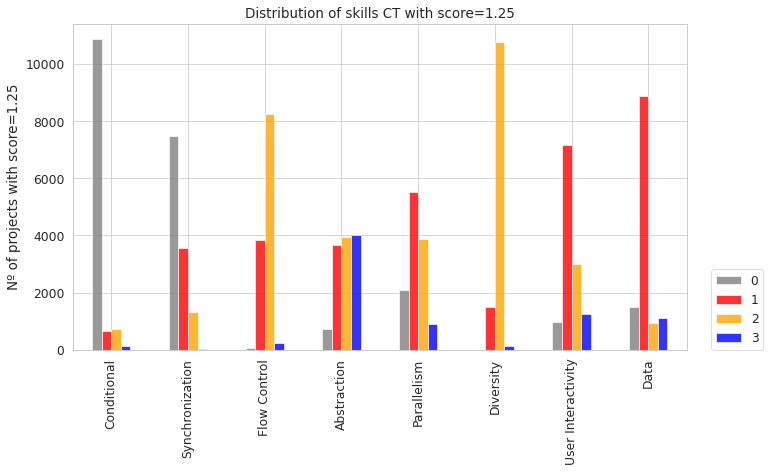

Matriz de correlación entre las 8 dimensiones para la puntuación 1.25


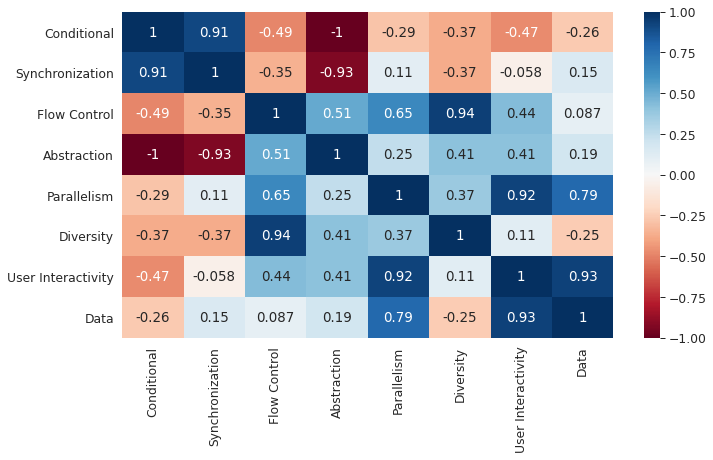

In [47]:
df_correlation_bar_chart(1.25, ct)

- Para la puntuación media de 1.25: Con respecto a la puntuación anterior, los proyectos de Dr. Snap! consiguen con más frecuencia 2 puntos en control de flujo, en paralelismo e interactividad con el usuario se consiguen mayores puntuaciones, mientras que en abstracción están más repartidas y no concentradas en 3 puntos.

  En la matriz de correlación existe una correlación casi perfecta entre sincronización y condicionales, entre diversidad y control de flujo, de manera que emplear mayor variedad de bloques afectaría a la capacidad de utilizar una secuencia de bloques en un orden apropiado o introducir bucles, entre paralelismo e interactividad con el usuario y entre esta última y representación de los datos, indicando que la gestión de las acciones del usuario sobre el programa, aumenta la capacidad de programar scripts con uno o más personajes a los que se asignan distintos atributos, desde el momento en que se pulsa la bandera verde. No existe correlación entre interactividad con el usuario y sincronización, situación que puede resultar extraña, ya que de algún modo hay que ajustar en el tiempo o esperar que el usuario realice determinada acción para el funcionamiento del programa, ni entre control de flujo y representación de los datos, ya que el conjunto de instrucciones es independiente de los atributos asignados a los personajes. Existe una correlación casi perfecta negativa entre abstracción y uso de condicionales, y entre sincronismo y abstracción. Así, cuando se definen bloques propios o se divide el código en scripts más sencillos de acuerdo a su funcionalidad, disminuiría la capacidad de establecer condiciones y dar lógica al programa, y disminuiría la capacidad de establecer mecanismos que los ordenen y ajusten en el tiempo.

--> Score: 1.375


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
7                 2                0             1            0            0   
10                1                1             2            1            1   
14                0                1             2            1            1   
17                0                1             2            3            1   
32                0                1             2            3            0   
...             ...              ...           ...          ...          ...   
113855            0                1             2            3            1   
113857            0                1             2            3            1   
113859            0                2             1            3            3   
113886            0                0             1            3            1   
113891            0                0             3            3            1   

        Diversity  User Interactivity  Data  
7               2                   3     3  
10              2                   2     1  
14              2                   2     2  
17              2                   1     1  
32              2                   2     1  
...           ...                 ...   ...  
113855          2                   1     1  
113857          2                   1     1  
113859          1                   1     0  
113886          2                   1     3  
113891          2                   1     1  

[8843 rows x 8 columns]

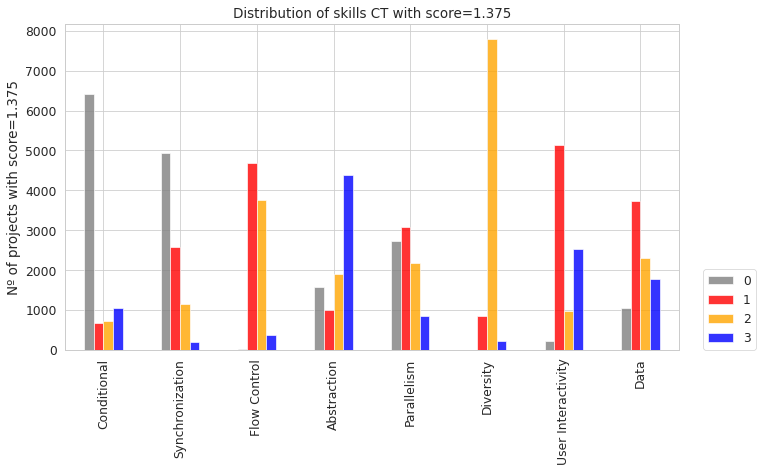

Matriz de correlación entre las 8 dimensiones para la puntuación 1.375


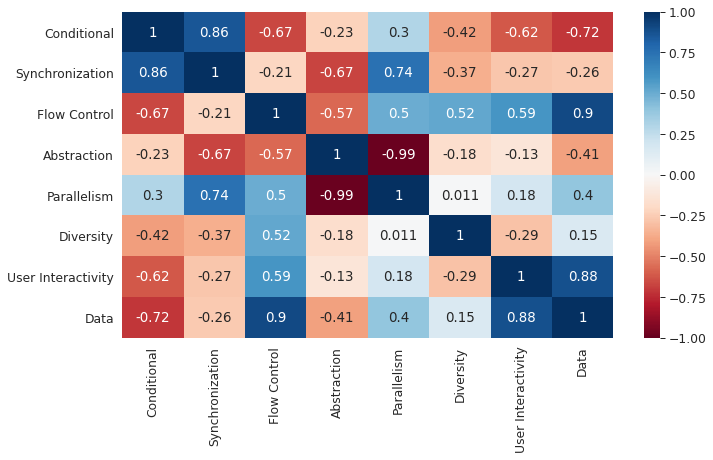

In [48]:
df_correlation_bar_chart(1.375, ct)

- Para la puntuación media de 1.375: Aunque se incrementa suavemente el nº de proyectos con puntuación distinta de 0 en condicionales, la mayor parte de ellos siguen tomando el valor de 0. En control de flujo hay una cantidad de proyectos algo mayor con 1 punto que con 2 puntos. En abstracción la mayor parte de los proyectos tiene 3 puntos. En interactividad con el usuario hay mayor nº de proyectos con 3 puntos. En representación de los datos disminuye el nº de proyectos con 1 punto.

  En la matriz de correlación se observa una elevada dependencia lineal en sentido positivo entre control de flujo y representación de los datos y entre interactividad con el usuario y representación de los datos. La  forma en que se declaran los atributos, las variables y las listas, no debería depender de las nociones algorítmicas que muestre el proyecto, ni de que el usuario realice cierta acción sobre el programa. Sin embargo están relacionadas linealmente. Sincronización y el uso de condicionales así como paralelismo con sincronización, tienen una elevada correlación en sentido positivo. No hay correlación entre paralelismo y diversidad. Se pone de manifiesto que entre paralelismo y abstracción hay una correlación negativa perfecta, de forma que según aumenta la capacidad para resolver el problema en partes más sencillas o definiendo bloques específicos, disminuye la capacidad para realizar scripts que se ejecuten de manera simultánea. Otras correlaciones en sentido negativo a tener en cuenta y que pueden llamar la atención son: representación de los datos con el uso de condicionales, abstracción con sincronización y control de flujo con el uso de condicionales.

--> Score: 1.5


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
0                 0                2             1            3            3   
24                0                1             2            3            2   
50                2                2             1            3            0   
60                0                2             1            3            3   
70                0                2             2            1            3   
...             ...              ...           ...          ...          ...   
113841            0                2             1            3            3   
113842            0                2             1            3            3   
113868            0                0             2            3            2   
113892            0                0             2            3            2   
113893            1                0             2            2            2   

        Diversity  User Interactivity  Data  
0               2                   0     1  
24              2                   1     1  
50              2                   2     0  
60              1                   2     0  
70              2                   1     1  
...           ...                 ...   ...  
113841          1                   2     0  
113842          1                   2     0  
113868          2                   1     2  
113892          2                   1     2  
113893          2                   2     1  

[9237 rows x 8 columns]

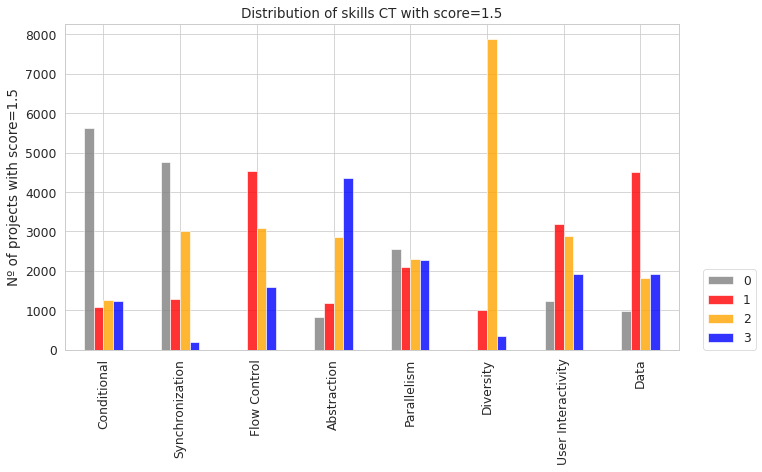

Matriz de correlación entre las 8 dimensiones para la puntuación 1.5


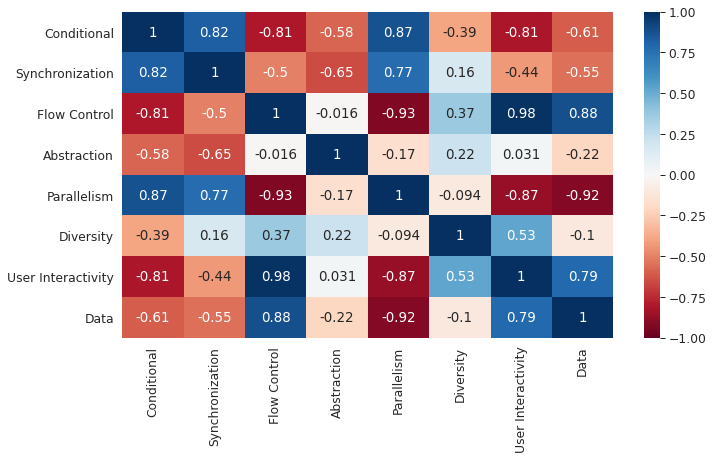

In [49]:
df_correlation_bar_chart(1.5, ct)

- Para la puntuación media de 1.5: en el diagrama de barras comparando con la puntuación anterior, hay mayor cantidad de proyectos en sincronización con 2 puntos y en control de flujo con 3 puntos.

  En la matriz de correlación hay bastantes dependencias lineales en sentido negativo, como las que se dan entre paralelismo con control de flujo, de manera que si se encuentran dos flujos de código a realizar por un personaje, o varios personajes que realizan las mismas acciones, disminuye la secuenciación del programa; uso de condicionales con control de flujo y con interactividad con el usuario, de forma que al introducir condiciones, disminuiría la eficiencia del algoritmo empleado y la posibilidad de introducir elementos interactivos, y entre paralelismo con interactividad con el usuario y con representación de los datos, de modo que al ejecutar varios flujos a la vez disminuye la gestión de elementos interactivos y la capacidad para declara variables y atributos. Son unas relaciones bastante contradictorias, pues dentro de la evaluación de paralelismo se encuentra la posibilidad de recibir tanto condiciones como mensajes del usuario. No hay correlación entre abstracción con control de flujo, cuando deberían estar relacionadas, ni entre abstracción e interactividad con el usuario. Se da una dependencia lineal alta y positiva entre control de flujo con interactividad con el usuario y con representación de los datos, entre interactividad con el usuario y representación de los datos, entre uso de condicionales con paralelismo y con sincronización, y entre paralelismo con sincronización.

--> Score: 1.625


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
66                2                0             2            2            2   
95                0                1             3            2            2   
122               0                3             1            2            3   
128               1                0             2            3            1   
169               0                3             2            1            3   
...             ...              ...           ...          ...          ...   
113795            3                0             2            3            2   
113799            2                2             1            0            0   
113833            3                2             1            0            0   
113837            0                0             1            3            1   
113880            0                0             3            3            2   

        Diversity  User Interactivity  Data  
66              2                   2     1  
95              2                   2     1  
122             1                   2     1  
128             3                   1     2  
169             2                   1     1  
...           ...                 ...   ...  
113795          2                   1     0  
113799          2                   3     3  
113833          2                   3     2  
113837          2                   3     3  
113880          2                   2     1  

[7756 rows x 8 columns]

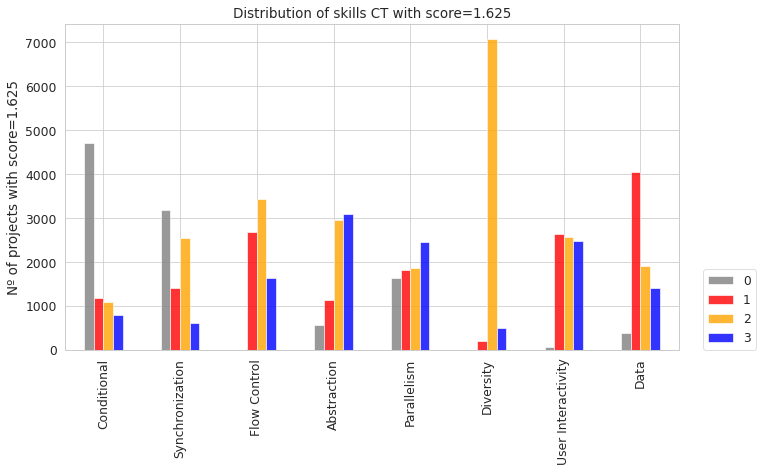

Matriz de correlación entre las 8 dimensiones para la puntuación 1.625


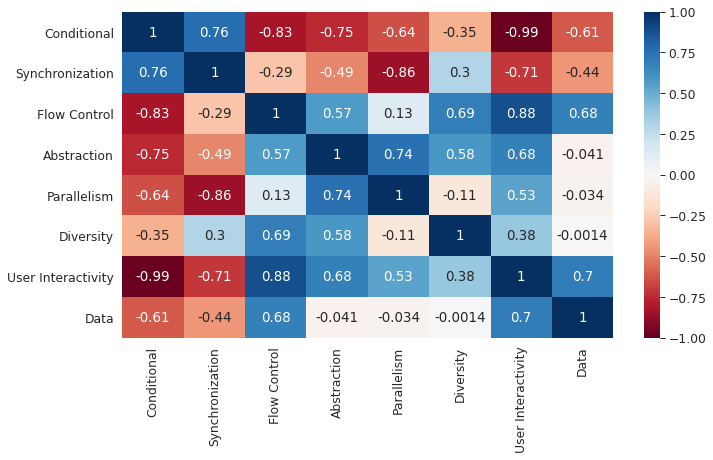

In [50]:
df_correlation_bar_chart(1.625, ct)

- Para la puntuación media de 1.625: Apenas se aprecian cambios en el diagrama de barras, con respecto a la puntuación media anterior, por lo que los proyectos están repartidos entre las distintas puntuaciones.

  En la matriz de correlación existen correlaciones positivas elevadas entre control de flujo e interactividad con el usuario, entre sincronización y uso de condicionales, entre paralelismo y abstracción, y entre interactividad con el usuario con representación de los datos. No hay correlación entre representación de los datos con abstracción, con paralelismo y con diversidad. Se produce una dependencia lineal fuerte en en sentido negativo entre condicionales con control de flujo, con abstracción y con interactividad con el usuario, entre paralelismo y sincronización y entre sincronización con interactividad con el usuario.
  
  Hasta esta puntuación existe una elevada correlación entre interactividad con el usuario y representación de los datos.

--> Score: 1.75


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
43                0                1             3            3            1   
47                0                2             1            3            3   
62                1                1             2            2            2   
87                0                2             2            2            3   
100               2                1             1            3            1   
...             ...              ...           ...          ...          ...   
113832            2                1             1            3            1   
113850            0                2             2            3            3   
113878            2                2             1            1            1   
113888            0                2             2            2            3   
113890            0                3             1            3            3   

        Diversity  User Interactivity  Data  
43              2                   2     2  
47              2                   2     1  
62              2                   2     2  
87              2                   2     1  
100             2                   2     2  
...           ...                 ...   ...  
113832          2                   2     2  
113850          2                   0     2  
113878          3                   3     1  
113888          2                   2     1  
113890          2                   1     1  

[7033 rows x 8 columns]

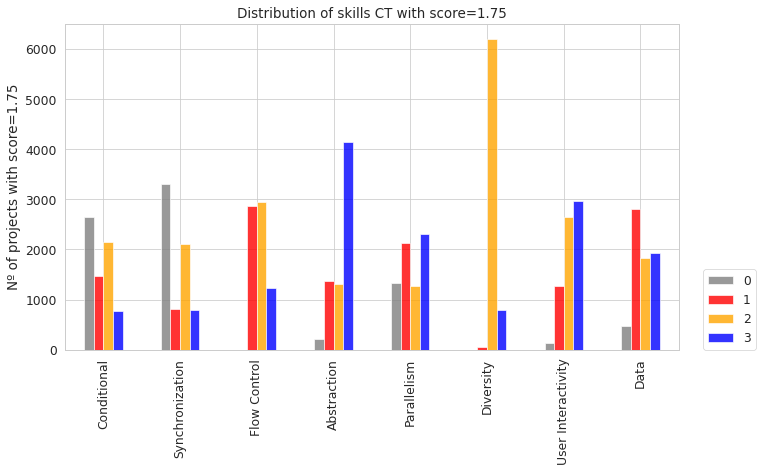

Matriz de correlación entre las 8 dimensiones para la puntuación 1.75


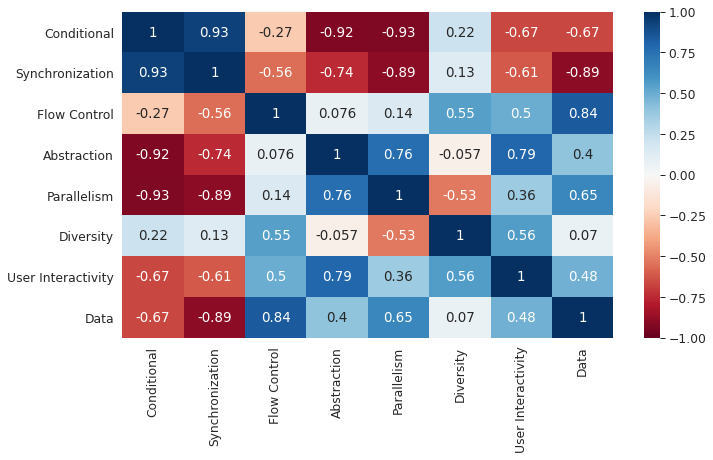

In [51]:
df_correlation_bar_chart(1.75, ct)

- Para la puntuación media de 1.75: Aumenta el nº de proyectos con 1 y 2 puntos en condicionales, con 3 puntos en abstracción y con 1 y 2 puntos en interactividad con el usuario. Disminuye la cantidad de proyectos con 1 punto en representación de los datos.

  En la matriz de correlación sigue existiendo una correlación casi perfecta entre sincronización y uso de condicionales, de manera que al emplear condiciones se fomenta el uso de eventos para ajustar temporalmente la realización de varias tareas. Se producen fuertes dependencias lineales en sentido positivo entre control de flujo y representación de los datos, aunque resulte extraño que al declarar adecuadamente variables, atributos y listas, mejore la estructura secuencial del programa; entre abstracción con paralelismo, pues con adecuados conocimientos de algoritmos se puede mejorar a la hora de estructurar el código de modo que se ejecuten varios scripts a la vez, y entre abstracción e interactividad con el usuario. No existe dependencia lineal entre diversidad y representación de los datos, ni entre diversidad y abstracción. Las distintas categorías de bloques empleados, no afectan a la correcta declaración de atributos y variables, ni a la sencillez con que se estructura el código. Las correlaciones en sentido negativo más elevadas se producen entre abstracción con el uso de condicionales, entre  uso de condicionales y paralelismo, entre paralelismo y representación de los datos y entre paralelismo y sincronización, de tal modo que si existen varios flujos de código disminuye la capacidad para ajustarlos temporalmente, chocando con lo que se puede deducir de estas dos dimensiones, que deberían estar positivamente relacionadas.

--> Score: 1.875


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
6                 3                0             2            3            2   
65                3                0             2            3            0   
77                0                2             1            3            3   
136               1                0             2            3            1   
160               2                0             3            3            0   
...             ...              ...           ...          ...          ...   
113783            3                0             2            3            2   
113786            3                0             2            3            2   
113813            3                0             2            3            2   
113848            0                2             2            3            3   
113884            0                3             1            3            3   

        Diversity  User Interactivity  Data  
6               2                   2     1  
65              3                   3     1  
77              2                   2     2  
136             3                   3     2  
160             2                   3     2  
...           ...                 ...   ...  
113783          2                   2     1  
113786          2                   2     1  
113813          2                   2     1  
113848          2                   2     1  
113884          2                   1     2  

[5569 rows x 8 columns]

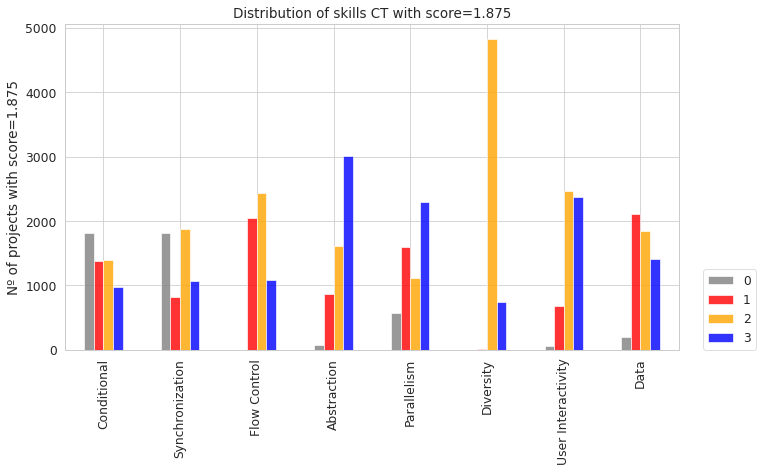

Matriz de correlación entre las 8 dimensiones para la puntuación 1.875


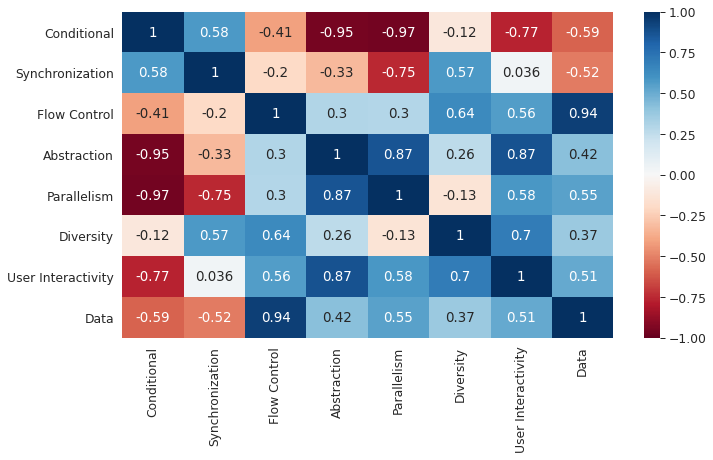

In [52]:
df_correlation_bar_chart(1.875, ct)

- Para la puntuación media de 1.875: Se puede ver una correlación elevada entre control de flujo y representación de los datos, de modo que la estructura secuencial del programa influye en la declaración de las listas, variables y atributos, entre abstracción e interactividad con el usuario, haciendo que si el usuario interactúa con el programa aumente la capacidad para realizar scripts y bloques adapatados más sencillos, y entre paralelismo y abstracción, de manera que si se definen scripts más sencillos, aumente la capacidad de desarrollar scripts que se ejecuten a la vez. No hay dependendencia lineal entre interactividad con el usuario y sincronización. Se obtienen coeficientes de correlación negativos elevados entre paralelismo y sincronización y entre interactividad con el usuario y uso de condicionales, de manera que cuando una de las dos dimensiones la otra disminuye. Se consiguen correlaciones casi perfectas en sentido negativo entre uso de condicionales y paralelismo y entre abstracción y uso de condicionales.

--> Score: 2


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
30                1                2             2            3            3   
41                0                3             3            1            3   
44                0                3             2            3            3   
55                1                2             2            1            3   
68                2                0             3            3            1   
...             ...              ...           ...          ...          ...   
113698            0                2             1            3            3   
113725            2                2             1            3            1   
113728            1                2             2            2            2   
113810            3                0             2            3            2   
113831            0                3             2            3            3   

        Diversity  User Interactivity  Data  
30              2                   2     1  
41              2                   2     2  
44              2                   2     1  
55              3                   3     1  
68              3                   3     1  
...           ...                 ...   ...  
113698          2                   2     3  
113725          2                   2     3  
113728          2                   3     2  
113810          3                   2     1  
113831          2                   2     1  

[4346 rows x 8 columns]

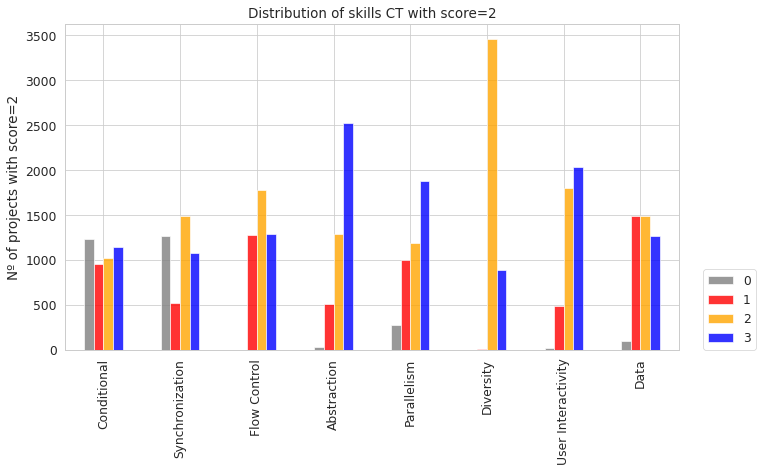

Matriz de correlación entre las 8 dimensiones para la puntuación 2


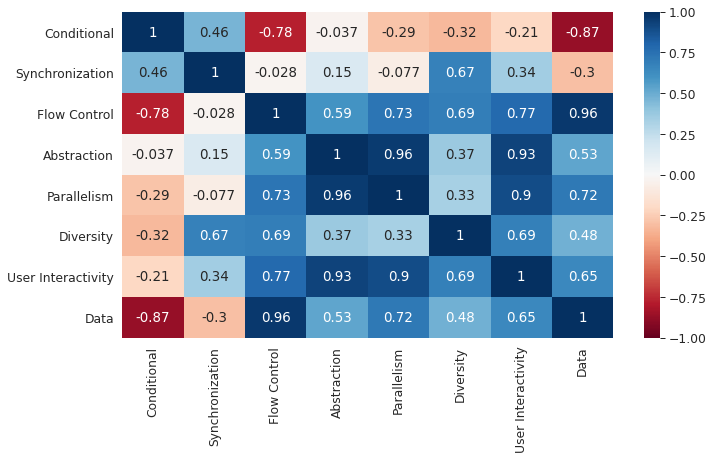

In [53]:
df_correlation_bar_chart(2, ct)

- Para la puntuación media de 2: El diagrama de barras sigue una distribución de puntuaciones para cada una de las capacidades similar al de la puntuación media anterior.

  En la matriz de correlación se perciben correlaciones casi perfectas positivas entre control de flujo y representación de los datos, entre abstracción e interactividad con el usuario, entre abstracción y paralelismo, y entre interactividad con el usuario y paralelismo, de manera que si el código espera que el usuario realice cierta acción, como utilizar el vídeo o el audio, aumenta la capacidad del programador para dividir el código en scripts más sencillos y a su vez realizar flujos de código en paralelo. No hay dependencia lineal entre abstracción y uso de condicionales, de forma que si se realizan varios scripts sencillos para resolver el problema no afecta a que en cada script se ejecute un conjunto de bloques u otro en función de una condición, ni entre control de flujo y sincronización, de manera que si hay una adecuada secuenciación de los bloques no afecta a que se produzcan eventos para ajustar temporalmente distintas instrucciones, ni entre sincronización y paralelismo, que deberían estar relacionadas. Existe una depedencia lineal en sentido negativo elevada entre condicionales y control de flujo y entre condicionales y representación de la información.

--> Score: 2.125


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
29                0                3             3            3            3   
86                2                0             1            3            2   
106               2                2             2            2            2   
129               1                3             2            2            3   
161               3                0             2            2            2   
...             ...              ...           ...          ...          ...   
113744            3                0             3            2            2   
113746            3                0             3            2            2   
113779            3                0             3            2            2   
113826            1                2             2            3            3   
113867            3                2             1            2            3   

        Diversity  User Interactivity  Data  
29              2                   2     1  
86              3                   3     3  
106             3                   2     2  
129             3                   2     1  
161             3                   3     2  
...           ...                 ...   ...  
113744          2                   3     2  
113746          2                   3     2  
113779          2                   3     2  
113826          2                   2     2  
113867          2                   3     1  

[3872 rows x 8 columns]

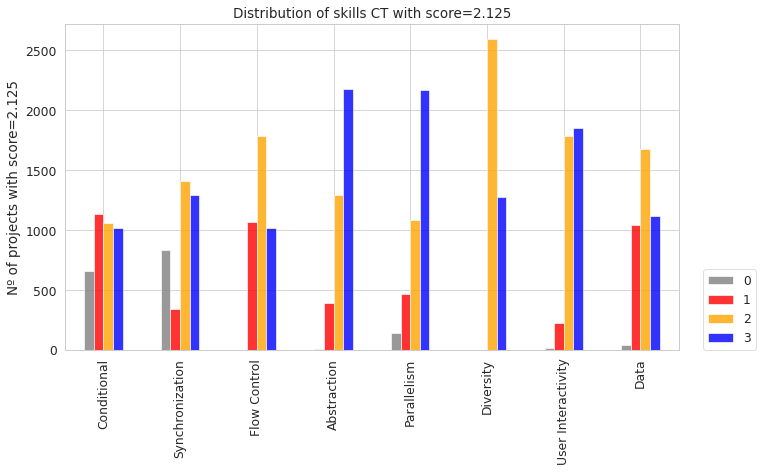

Matriz de correlación entre las 8 dimensiones para la puntuación 2.125


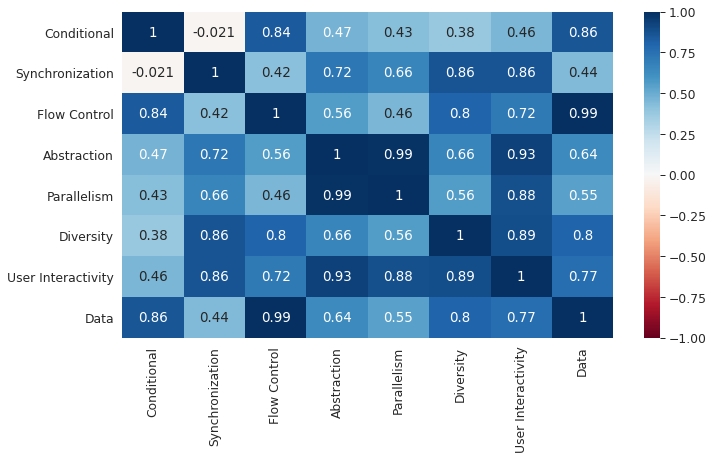

In [54]:
df_correlation_bar_chart(2.125, ct)

- Para la puntuación media de 2.125: en el diagrama de barras se aprecian pequeñas diferencias con respecto a la puntuación anterior en paralelismo y diversidad, donde una mayor cantidad de proyectos consiguen 3 puntos.

  En la matriz de correlación existe una correlación casi perfecta entre control de flujo y representación de los datos, entre paralelismo y abstracción y entre interactividad con el usuario y abstracción. Es más entre interactividad con el usuario y el resto de dimensiones, salvo uso de condicionales, se dan altos coeficientes de correlación, cuando se podría pensar que no existe relación. Hay una elevada dependencia lineal entre diversidad y control de flujo, entre diversidad y sincronización, entre control de flujo y uso de condicionales y entre éste último y representación de los datos. No existe dependencia lineal entre sincronización y uso de condicionales.

--> Score: 2.25


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
25                3                3             1            3            3   
26                3                3             1            3            3   
67                1                3             2            3            3   
72                3                3             1            3            3   
92                1                2             3            2            3   
...             ...              ...           ...          ...          ...   
113727            1                3             2            2            3   
113729            3                2             1            3            1   
113748            2                2             1            3            3   
113820            3                0             1            3            2   
113883            0                3             3            3            3   

        Diversity  User Interactivity  Data  
25              2                   3     0  
26              2                   3     0  
67              2                   2     2  
72              2                   2     1  
92              3                   2     2  
...           ...                 ...   ...  
113727          3                   3     1  
113729          3                   2     3  
113748          2                   2     3  
113820          3                   3     3  
113883          3                   1     2  

[3043 rows x 8 columns]

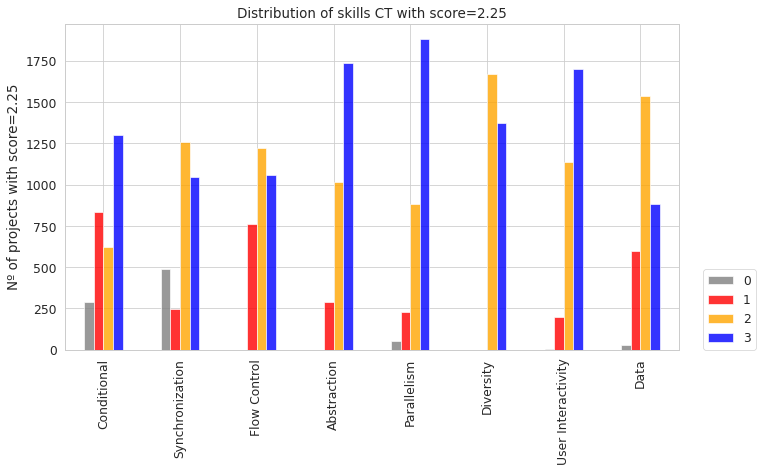

Matriz de correlación entre las 8 dimensiones para la puntuación 2.25


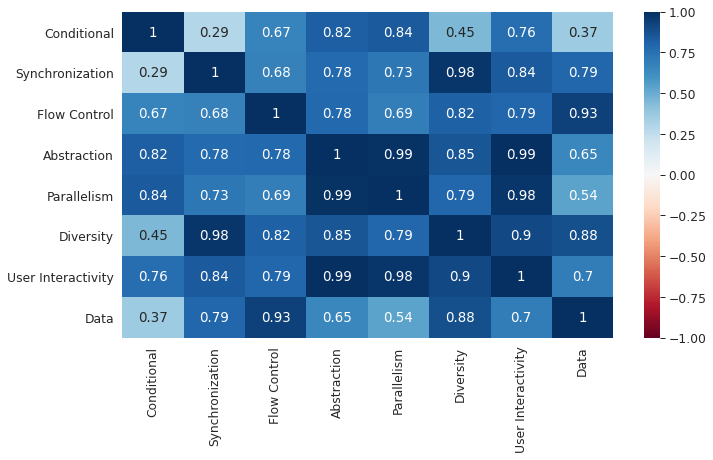

In [55]:
df_correlation_bar_chart(2.25, ct)

- Para la puntuación media de 2.25: en el diagrama de barras se observa que uso de condicionales, paralelismo e interactividad con el usuario tienen mayor cantidad de proyectos con 3 puntos. Incluso en diversidad, aumenta el nº de proyectos con 3 puntos, aún cuando el nº de proyectos con 2 puntos es algo mayor.

  En la matriz de correlación todas las correlaciones son positivas, aunque alguna sea muy débil, como la que se da entre sincronización y uso de condicionales. El que se ejecuten unas sentencias u otras en función de condiciones no guarda mucha relación con el hecho de que varios conjuntos de bloques se ejecuten a la vez o en función de un evento. De hecho, en la matriz de correlación de la puntuación media anterior se ve que no existe dependencia entre ambas. Se dan correlaciones bajas y moderadas entre condicionales y representación de los datos, condicionales y diversidad de bloques y entre paralelismo y representación de los datos. El resto de dimensiones tienen correlaciones positivas altas o casi perfectas. Dentro de las correlaciones casi perfectas están las que se producen entre control de flujo y representación de los datos, estableciendo una dependencia entre los conocimientos algorítmicos que te permiten establecer una secuenciación de los bloques o el empleo de bloques iterativos, y la manera en que se definen y modifican los atributos de los objetos, las variables y las listas; entre diversidad con sincronización, de manera que a mayor variedad de bloques empleados, mayor facilidad para establecer eventos que ajusten temporalmente la ejecución de varios conjuntos de bloques; entre paralelismo y abstracción, de forma que si se tienen varios scripts a ejecutar simultáneamente, existen varios scripts sencillos encargados de funcionalidades concretas, y entre interactividad con el usuario con abstracción, con paralelismo o con diversidad, de forma que si el usuario actúa sobre el programa aumenta la definición de funciones sencillas o bloques propios, la capacidad para realizar funciones que se ejecutan simutáneamente, o los bloques de distintos tipos empleados.

--> Score: 2.375


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
97                0                3             3            3            3   
114               0                3             1            3            3   
117               1                2             3            3            3   
121               1                2             3            3            3   
381               2                3             3            3            0   
...             ...              ...           ...          ...          ...   
113655            3                2             2            2            3   
113781            2                2             2            3            3   
113800            3                2             1            3            3   
113846            3                2             3            2            3   
113851            3                1             3            2            2   

        Diversity  User Interactivity  Data  
97              3                   2     2  
114             3                   3     3  
117             3                   2     2  
121             3                   2     2  
381             2                   3     3  
...           ...                 ...   ...  
113655          3                   2     2  
113781          3                   2     2  
113800          2                   2     3  
113846          3                   2     1  
113851          3                   3     2  

[2441 rows x 8 columns]

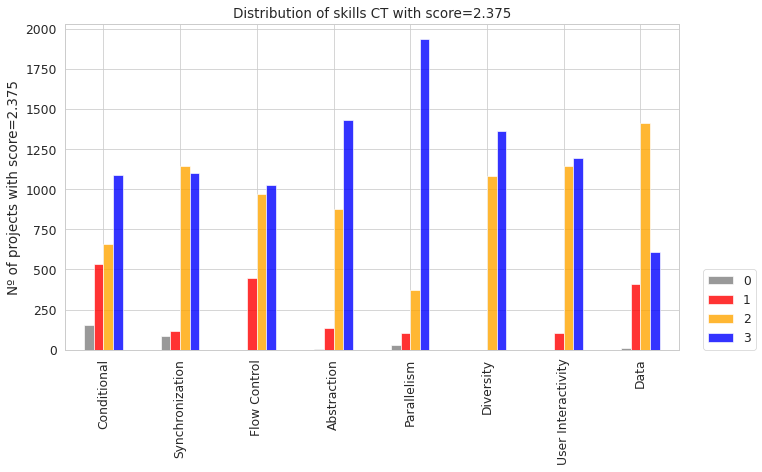

Matriz de correlación entre las 8 dimensiones para la puntuación 2.375


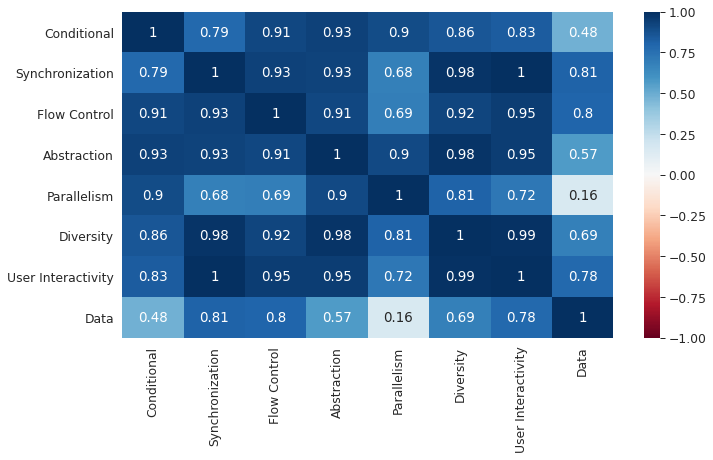

In [56]:
df_correlation_bar_chart(2.375, ct)

- Para la puntuación media de 2.375: en el diagrama de barras aumenta la proporción de proyectos con 3 puntos en paralelismo y en diversidad.
  
  En la matriz de correlación se consiguen correlaciones muy elevadas entre la mayoría de las dimensiones. Representación de los datos presenta las menores correlaciones con el resto de dimensiones, salvo con sincronización (0,81) y con control de flujo (0,8). La menor de ellas es la que se produce entre interactividad con el usuario y paralelismo, indicando que la existencia de dos flujos de código que se ejecuten en el mismo momento, no depende de las acciones que pueda realizar el usuario del programa, ya sea hacer preguntas, mover objetos o personajes o insertar audio o vídeo.

--> Score: 2.5


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
21                2                3             2            3            3   
96                3                3             3            3            2   
99                3                3             2            2            3   
118               3                2             2            3            3   
130               3                3             3            2            3   
...             ...              ...           ...          ...          ...   
113875            3                3             1            3            3   
113877            3                2             2            3            3   
113882            3                3             3            2            3   
113887            3                3             3            3            3   
113889            2                2             2            3            3   

        Diversity  User Interactivity  Data  
21              3                   1     3  
96              2                   2     2  
99              3                   2     2  
118             3                   2     2  
130             3                   1     2  
...           ...                 ...   ...  
113875          3                   2     2  
113877          3                   1     3  
113882          2                   2     2  
113887          2                   2     1  
113889          3                   3     2  

[2433 rows x 8 columns]

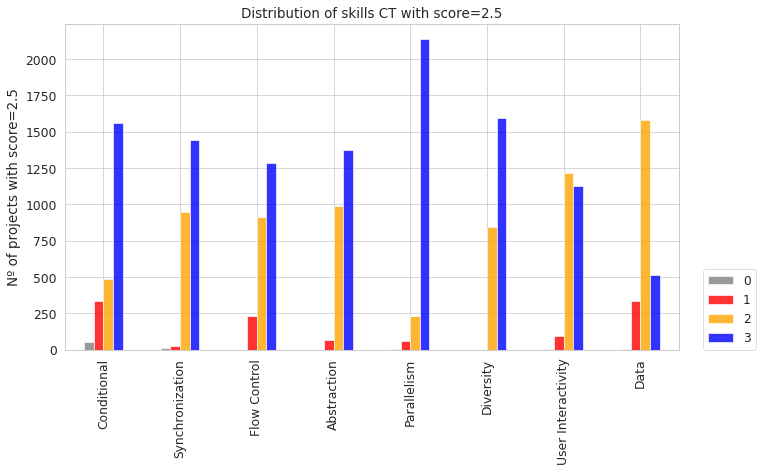

Matriz de correlación entre las 8 dimensiones para la puntuación 2.5


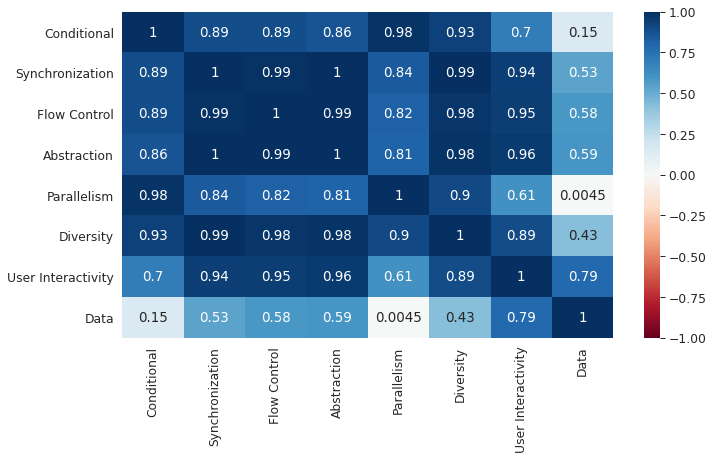

In [57]:
df_correlation_bar_chart(2.5, ct)

- Para la puntuación media de 2.5: en el diagrama de barras se observa que para 6 de las 8 dimensiones los proyectos toman con mayor frecuencia la puntuación de 3, aunque aún se mantiene elevada la cantidad de proyectos con 2 puntos. Sin embargo, en interactividad con el usuario, la cantidad de proyectos con 2 y 3 puntos es bastante similar y en representación de los datos la puntuación más frecuente es 2.
  
  En la matriz de correlación se distingue que representación de los datos es la dimensión menos correlacionada con las demás, obteniendo valores cercanos a 0 con paralelismo y con condicionales, que indican que no tienen dependencia lineal. Esto es así porque al declarar y modificar variables, listas y atributos de los personajes, no se tienen en cuenta la posibilidad de realizar flujos de código para su ejecución simultánea, ni la posibilidad de evaluar condiciones para determinar qué conjunto de instrucciones se ejecutan. Paralelismo e interactividad con el usuario tienen una dependencia lineal moderada. El resto de dimensiones presentan entre sí altas o incluso casi perfectas correlaciones positivas.

--> Score: 2.625


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
85                2                3             2            2            3   
91                2                3             2            2            3   
93                3                3             3            3            3   
94                2                3             2            2            3   
152               3                3             3            2            2   
...             ...              ...           ...          ...          ...   
113580            3                3             3            2            3   
113657            3                3             3            2            3   
113816            3                2             3            3            3   
113879            3                3             2            2            3   
113885            3                2             2            3            3   

        Diversity  User Interactivity  Data  
85              3                   3     3  
91              3                   3     3  
93              2                   2     2  
94              3                   3     3  
152             3                   3     2  
...           ...                 ...   ...  
113580          3                   2     2  
113657          3                   2     2  
113816          3                   2     2  
113879          3                   3     2  
113885          3                   3     2  

[2072 rows x 8 columns]

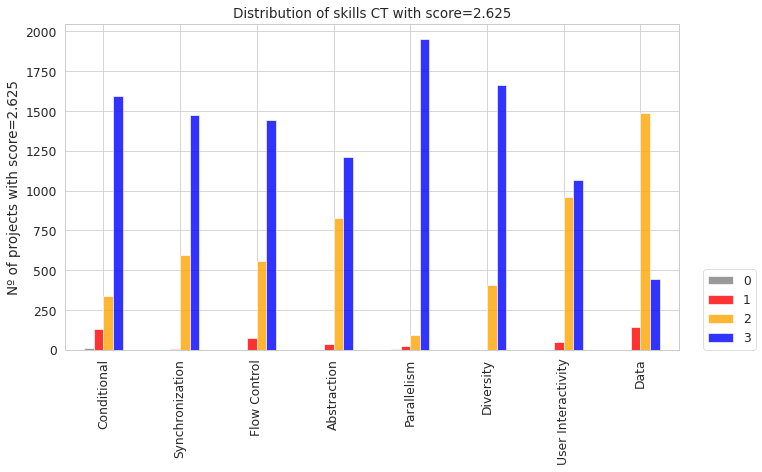

Matriz de correlación entre las 8 dimensiones para la puntuación 2.625


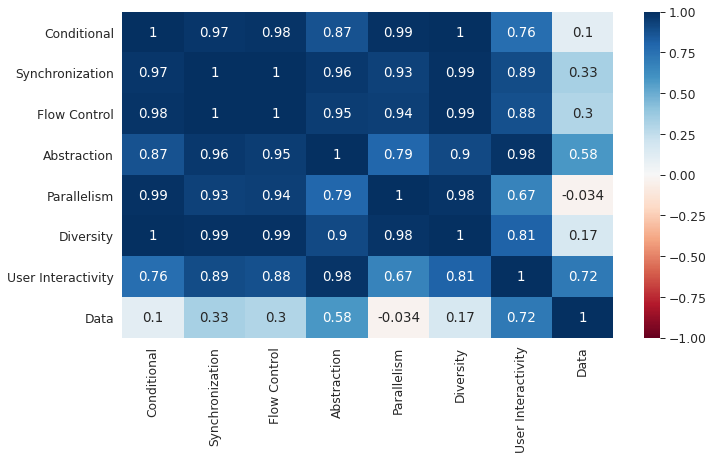

In [58]:
df_correlation_bar_chart(2.625, ct)

- Para la puntuación media de 2.625: en el diagrama de barras se observa una mayor diferencia entre la cantidad de proyectos que consiguen 3 y 2 puntos en todas las dimensiones, exceptuando interactividad con el usuario y representación de los datos.

  Los coeficientes de correlación de representación de los datos con repecto al resto de dimensiones, son aún más bajos que en la matriz de correlación de la puntuación anterior. Esto es así porque crear o modificar variables o listas no afecta al código realizado con bloques de diferentes tipos, con distintos flujos en paralelo, con bucles, con condiciones a evaluar para saber qué conjunto de bloques ejecutar, o estableciendo eventos que indiquen cuando se ejecuta el código. La correlación es moderada positiva entre abstracción y representación de los datos, de modo que sí existe dependencia lineal al realizar operaciones con variables y listas, y realizar programas dentro del proyecto que resuelvan problemas específicos o definir bloques propios que sean utilizados por cualquier programa del proyecto. Entre interactividad con el usuario y representación de los datos se da una correlación alta, también algo inesperada. Interactividad con el usuario tiene correlaciones altas con las otras dimensiones. Para cada par del resto de dimensiones se tienen correlaciones muy elevadas e incluso casi perfectas.

--> Score: 2.75


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
74                3                3             3            3            3   
187               3                3             3            2            3   
314               3                2             3            3            3   
410               3                3             3            3            3   
454               3                3             3            3            3   
...             ...              ...           ...          ...          ...   
113733            3                3             3            3            3   
113794            3                3             3            3            3   
113853            3                3             3            3            3   
113860            3                3             3            3            3   
113876            3                3             2            3            3   

        Diversity  User Interactivity  Data  
74              3                   2     2  
187             3                   3     2  
314             3                   2     3  
410             2                   3     2  
454             3                   2     2  
...           ...                 ...   ...  
113733          3                   2     2  
113794          3                   2     2  
113853          3                   2     2  
113860          3                   2     2  
113876          3                   3     2  

[1649 rows x 8 columns]

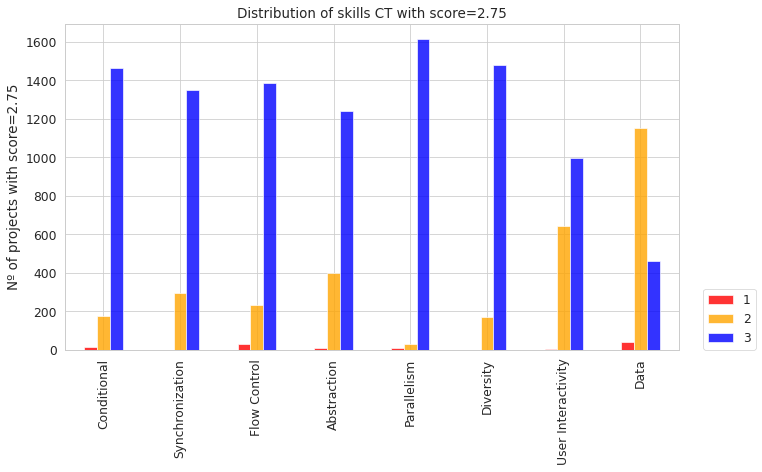

Matriz de correlación entre las 8 dimensiones para la puntuación 2.75


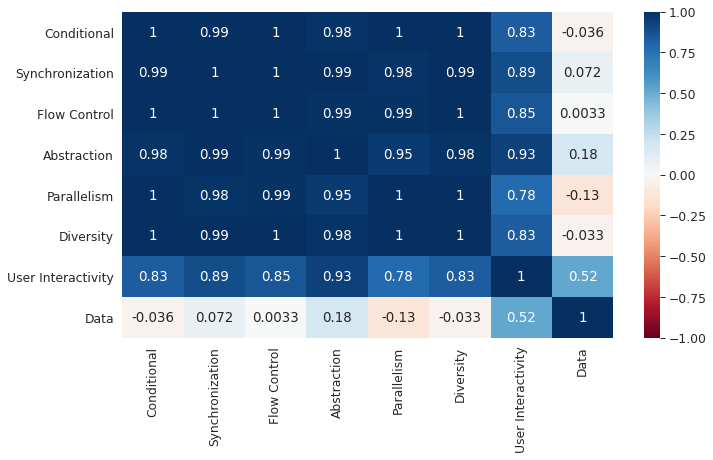

In [59]:
df_correlation_bar_chart(2.75, ct)

- Para la puntuación media de 2.75: en el diagrama de barras se aprecia que 3 puntos es la puntuación más frecuente para cada dimensión, salvo en representación de los datos. Con ello vemos que existen pocos proyectos que contengan operaciones con listas. En interactividad con el usuario siguen existiendo muchos proyectos con 2 puntos, a pesar de que 3 puntos sea la puntuación mayoritaria.

  La matriz de correlación muestra correlaciones prácticamente perfectas para cada par de dimensiones, a excepción de las que se dan entre interactividad con el usuario y el resto de dimensiones, que son algo menores pero también muy elevadas, y las que se producen entre representación de los datos y las demás dimensiones, donde los valores próximos a 0 nos indican que no hay dependencia lineal, de manera que es independiente la declaración de variables o listas del uso de condiciones para ver que conjunto de bloques se ejecutan, de la utilización de eventos para hacer que los bloques se ejecuten en el momento adecuado, del empleo de bucles, de la definición de bloques en el proyecto para evitar código duplicado, de la posibilidad de ejecutar varios flujos de código por uno o varios personajes de manera simultánea en base a alguna condición o mensaje recibido o utilizando clones, o de usar en el proyecto diversos tipos de bloques. Existe una correlación moderada entre interacción con el usuario y representación de los datos.

--> Score: 2.875


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
75                3                3             3            3            3   
137               3                3             3            3            3   
241               3                3             3            3            3   
267               3                3             3            3            3   
316               3                3             3            3            3   
...             ...              ...           ...          ...          ...   
113522            3                3             3            3            3   
113525            3                2             3            3            3   
113708            3                3             3            3            3   
113753            3                3             2            3            3   
113796            3                3             3            2            3   

        Diversity  User Interactivity  Data  
75              3                   3     2  
137             3                   3     2  
241             3                   3     2  
267             3                   3     2  
316             3                   2     3  
...           ...                 ...   ...  
113522          3                   3     2  
113525          3                   3     3  
113708          3                   3     2  
113753          3                   3     3  
113796          3                   3     3  

[1026 rows x 8 columns]

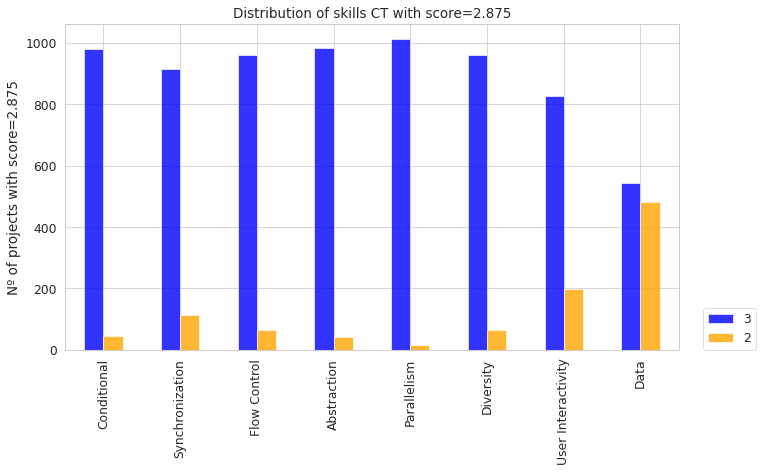

Matriz de correlación entre las 8 dimensiones para la puntuación 2.875


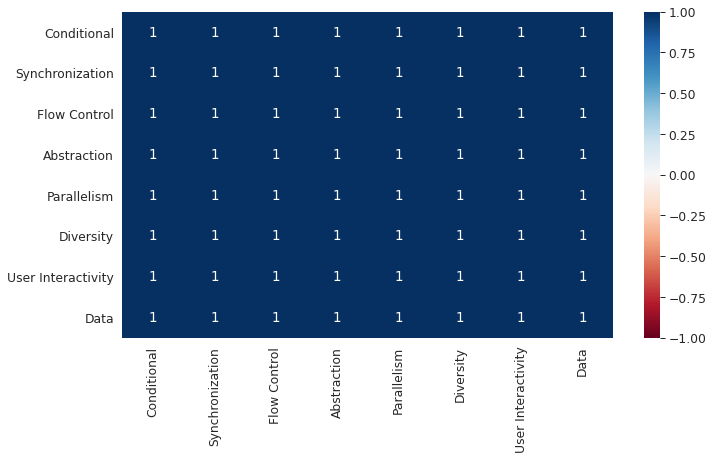

In [60]:
df_correlation_bar_chart(2.875, ct)

- Para la puntuación media de 2.875: Menos en representación de los datos, donde los proyectos se reparten entre las puntuaciones de 2 y 3, la puntuación predominante en las distintas dimensiones es 3.

  Se observa una correlación perfecta entre cada par de dimensiones del pensamiento computacional.

--> Score: 3


Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
1008              3                3             3            3            3   
1188              3                3             3            3            3   
1193              3                3             3            3            3   
1824              3                3             3            3            3   
1843              3                3             3            3            3   
...             ...              ...           ...          ...          ...   
112574            3                3             3            3            3   
112598            3                3             3            3            3   
113526            3                3             3            3            3   
113847            3                3             3            3            3   
113872            3                3             3            3            3   

        Diversity  User Interactivity  Data  
1008            3                   3     3  
1188            3                   3     3  
1193            3                   3     3  
1824            3                   3     3  
1843            3                   3     3  
...           ...                 ...   ...  
112574          3                   3     3  
112598          3                   3     3  
113526          3                   3     3  
113847          3                   3     3  
113872          3                   3     3  

[312 rows x 8 columns]

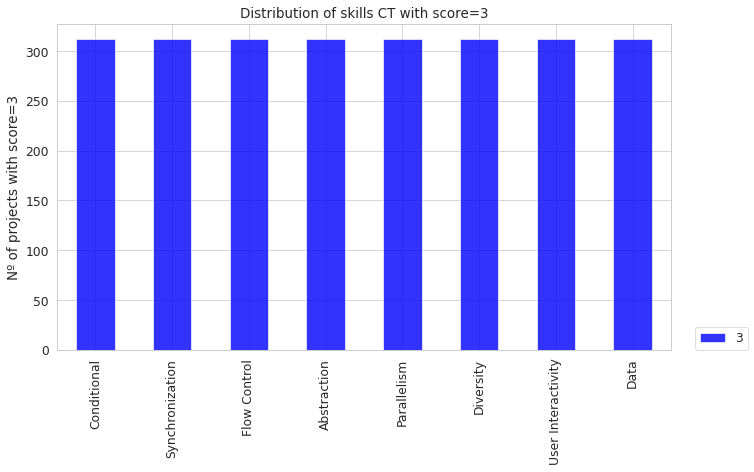

Desviación típica de cada dimensión del pensamiento computacional


Conditional          NaN
Synchronization      NaN
Flow Control         NaN
Abstraction          NaN
Parallelism          NaN
Diversity            NaN
User Interactivity   NaN
Data                 NaN
dtype: float64

Matriz de correlación entre las 8 dimensiones para la puntuación 3


Conditional  Synchronization  Flow Control  Abstraction  \
Conditional                 NaN              NaN           NaN          NaN   
Synchronization             NaN              NaN           NaN          NaN   
Flow Control                NaN              NaN           NaN          NaN   
Abstraction                 NaN              NaN           NaN          NaN   
Parallelism                 NaN              NaN           NaN          NaN   
Diversity                   NaN              NaN           NaN          NaN   
User Interactivity          NaN              NaN           NaN          NaN   
Data                        NaN              NaN           NaN          NaN   

                    Parallelism  Diversity  User Interactivity  Data  
Conditional                 NaN        NaN                 NaN   NaN  
Synchronization             NaN        NaN                 NaN   NaN  
Flow Control                NaN        NaN                 NaN   NaN  
Abstraction                 NaN        NaN                 NaN   NaN  
Parallelism                 NaN        NaN                 NaN   NaN  
Diversity                   NaN        NaN                 NaN   NaN  
User Interactivity          NaN        NaN                 NaN   NaN  
Data                        NaN        NaN                 NaN   NaN

In [61]:
df_correlation_bar_chart(3, ct)

- Para la puntuación media de 3: Como todas las dimensiones toman un valor de 3 para todos los proyectos de Dr. Snap!, no hay dispersión en torno a la media, siendo la varianza y su raíz, la desviación típica, NaN. La covarianza mide el grado de variación conjunta de dos variables aleatorias o dimensiones con respecto a sus medias. Por ello, la matriz de correlación de Pearson, tiene como valores NaN, al ser el cociente de la covarianza con respecto al producto de las desviaciones típicas.

## Aprendizaje no supervisado: clustering k-means.

K-Means es un algoritmo de aprendizaje no supervisado que divide el conjunto total de proyectos de Dr. Snap! analizados en k grupos o clústeres, minimizando la distancia intra-cluster, de manera que exista cohesión entre los proyectos de cada clúster. Por lo tanto se busca que la suma de las distancias al cuadrado desde cada punto o proyecto a la media o centro del grupo sea la menor posible. Lo ideal es que los elementos del clúster sean muy similares entre sí y difieran de los proyectos de los demás clústeres, creando grupos disjuntos.
Se necesita conocer de antemano el nº de clústeres o k.

Se crea un array de vectores con 8 características que se corresponden con las 8 dimensiones del pensamiento computacional. Cada vector se corresponde con un proyecto de Dr. Snap!

In [62]:
X = np.array(df_ct)

In [63]:
X.shape

(113894, 8)

Como en nuestro dataset no sabemos a priori el nº de clústeres, se utilizan herramientas para poder estimarlo, como la **curva de Elbow**.
Se itera sobre un conjunto de posibles valores de k y se busca el punto en que un aumento en el valor de k no implique una disminución elevada en el valor de la inercia, que es la suma de las distancias euclídeas de cada punto asociado a un proyecto de Dr Snap! con respecto al centroide o centro del clúster al que pertenece. Suele buscarse el valor de k donde se produce un cambio abrupto de pendiente, y a partir del mismo la curva de la inercia no disminuya demasiado, se suavice.
$$Inercia=SSE=\sum \limits _{i=0}^{N} \|{x_i-c_i\|^2}$$

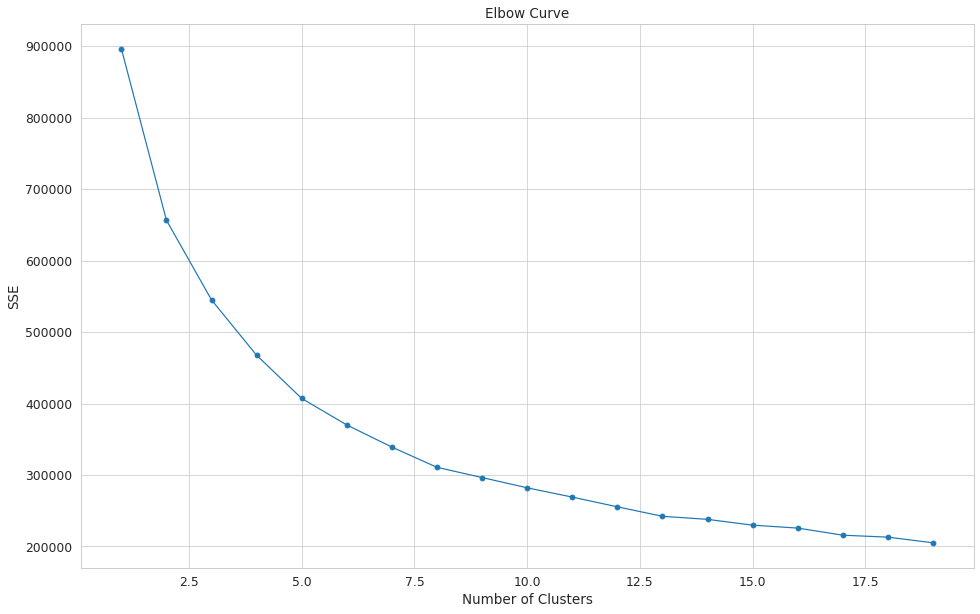

In [64]:
Nc= range(1, 20)
kmeans = [KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#print(score)
sse = [kmeans[i].inertia_ for i in range(len(kmeans))]
plt.figure(figsize=(16, 10))
plt.plot(Nc, sse, marker= 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show();

Como no se aprecia un cambio abrupto en la pendiente con bajo valor de inercia, el valor de k puede tomar cualquier valor entero del rango [5, 10]. Se recurre por ello a otra métrica, el **coeficiente de la silueta (SC)**. En este caso, se mide la media de la distancia de separación entre los grupos y su rango de valores es [-1, 1], de modo que un valor cercano a 1 indica que el clúster tiene los puntos muy cercanos entre sí y separados de los puntos o proyectos que pertenecen a otros clústeres.
$$SC(x)=\frac {b(x)-a(x)}{max[a(x),b(x)]}$$

- a(x): cohesión de cada clúster o distancia media intra-cluster del punto o proyecto con todos los puntos o proyectos del mismo clúster.
- b(x): separación con otros clústeres o distancia media inter-cluster del punto o proyecto con todos los puntos o proyectos del clúster vecino o clúster más próximo. 

Cuando b(x)>>a(x) indica que el clúster es muy compacto y está separado de los clústeres vecinos. Se obtiene a continuación la media del coeficiente de la silueta para todos los puntos y se elige el valor de k que maximice esta media. Tiene por lo tanto un alto coste computacional cuando el nº de muestras es elevado, como en este caso.

To n_clusters = 2 the Silhouette Coefficient is: 0.26736535493829355
To n_clusters = 3 the Silhouette Coefficient is: 0.25847939695945005
To n_clusters = 4 the Silhouette Coefficient is: 0.24803261340079288
To n_clusters = 5 the Silhouette Coefficient is: 0.2624345146589414
To n_clusters = 6 the Silhouette Coefficient is: 0.247391159541411
To n_clusters = 7 the Silhouette Coefficient is: 0.25098297354584775
To n_clusters = 8 the Silhouette Coefficient is: 0.27123486799318147
To n_clusters = 9 the Silhouette Coefficient is: 0.276144740038891
To n_clusters = 10 the Silhouette Coefficient is: 0.26687230995675104
To n_clusters = 11 the Silhouette Coefficient is: 0.2586624088244013
To n_clusters = 12 the Silhouette Coefficient is: 0.2622670198183515
To n_clusters = 13 the Silhouette Coefficient is: 0.2725419481054698
To n_clusters = 14 the Silhouette Coefficient is: 0.27207956093932045
To n_clusters = 15 the Silhouette Coefficient is: 0.273797805165648
To n_clusters = 16 the Silhouette Coef

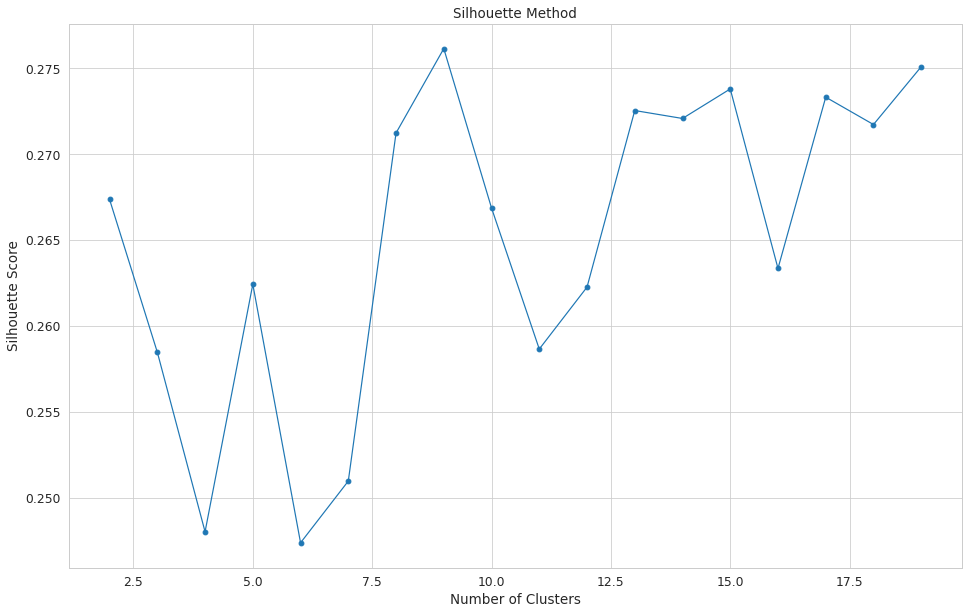

In [65]:
# distancia entre los puntos de datos de un clúster y los puntos de datos de otro clúster.
K = range(2,20) 
# El que sea mayor
silhouette_avg = []
for k in K:
    kmeans_sil = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    silhouette = silhouette_score(X, kmeans_sil.labels_)
    print("To n_clusters =", k, "the Silhouette Coefficient is:", silhouette)
    silhouette_avg.append(silhouette)
plt.figure(figsize=(16, 10))
plt.plot(K, silhouette_avg, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show();

Se produce un máximo más o menos claro en k=9. Hay que tener en cuenta que el nº de agrupaciones no debe ser muy elevado. Si analizamos los valores obtenidos para el coeficiente de la silueta vemos que están muy juntos, entre 0,247 y 0,27615 para este rango de valores de k. Se recurre a otros dos métricas de validación interna del clustering.
- **Índice de Davies-Bouldin**: Relación entre la suma de las distancias promedio entre cada punto del clúster con el centroide para dos clústeres y la distancia entre los centroides de ambos clústeres, teniendo en cuenta el peor de los casos, que dichos centroides estén muy juntos y/o que el diámetro de estos clústeres sea muy grande. Es una medida de similitud entre clústeres diferentes e interesa que sea lo **menor** posible.
$$DB=\frac{1}{k}\sum \limits _{i=1,i\neq j}^{k} max\frac{d(c_i)+d(c_j)}{d(c_i ,c_j)}$$
- **Índice de Calinski-Harabasz**: Es el criterio de relación de varianza, de modo que un valor elevado indica que los clústeres son densos y están bien separados. Interesa por lo tanto un valor de pico.
$$DB=\frac{SSB}{SSW}x\frac{N-k}{k-1}$$

    - SSB: Dispersión entre agrupaciones diferentes.
    - SSW: Dispersión intra-cluster.
    - N: Cantidad de datos, observaciones o proyectos de Dr. Snap!
    - k: Cantidad de clústeres.

Sum of squared error, Elbow  Silhouette Score  Davies Bouldin Score  \
2                 656517.297468          0.267365              1.516808   
3                 544984.885565          0.258479              1.601837   
4                 467618.157136          0.248033              1.434205   
5                 407159.796390          0.262435              1.291406   
6                 370064.575555          0.247391              1.395563   
7                 339107.284018          0.250983              1.360372   
8                 310788.723412          0.271235              1.285622   
9                 296475.564342          0.276145              1.259877   
10                282121.245267          0.266872              1.345030   
11                269129.054208          0.258662              1.439448   
12                255533.800548          0.262267              1.447489   
13                242257.907980          0.272542              1.411499   
14                237980.696312          0.272080              1.419149   
15                229853.238283          0.273798              1.421719   
16                225756.164910          0.263356              1.452617   
17                215824.623114          0.273319              1.447596   
18                213087.733016          0.271727              1.440192   
19                205187.841645          0.275091              1.401883   

    Calinski Harabasz Score  
2              41648.555921  
3              36739.818165  
4              34826.301989  
5              34225.719570  
6              32408.158885  
7              31204.809940  
8              30666.309636  
9              28815.488284  
10             27560.565651  
11             26551.487044  
12             25972.508668  
13             25632.676901  
14             24243.420936  
15             23595.186341  
16             22559.397839  
17             22449.984045  
18             21486.630551  
19             21317.608300

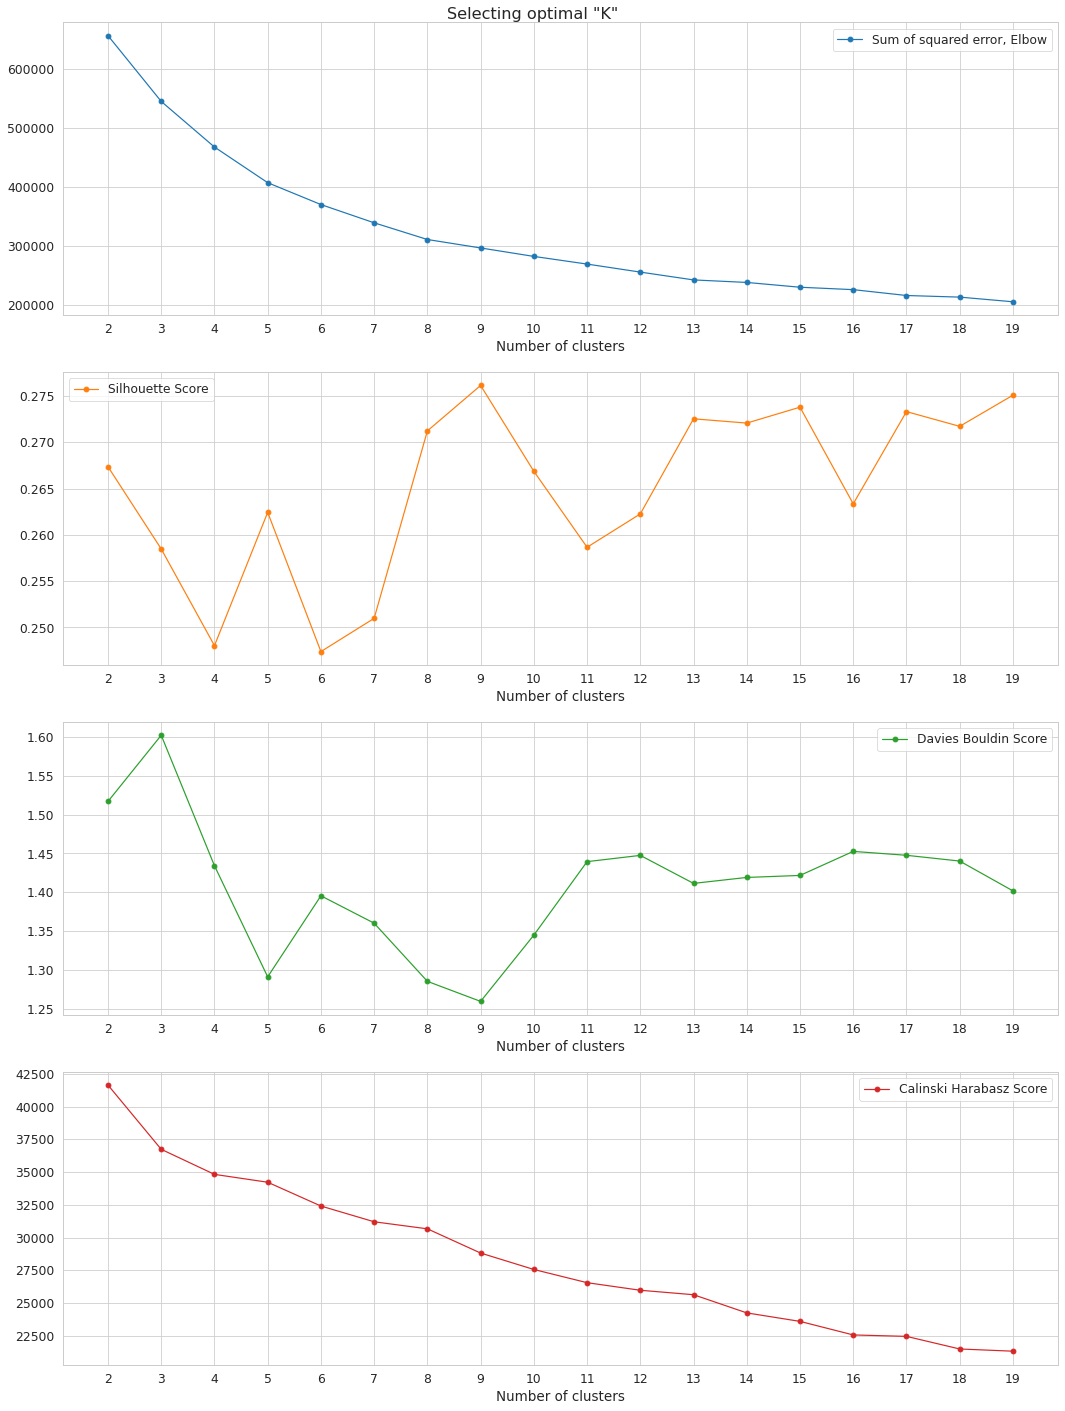

In [70]:
search_range = range(2, 20)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans4 = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    inertia = kmeans4.inertia_ # varianza interna de los clusters
    temp_dict['Sum of squared error, Elbow'] = inertia
    cluster = kmeans4.predict(X)
    labels = kmeans4.labels_
    chs = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X,labels)
    ss = silhouette_score(X, labels)
    temp_dict['Silhouette Score'] = ss
    temp_dict['Davies Bouldin Score'] = db
    # more higher
    temp_dict['Calinski Harabasz Score'] = chs
    report[k] = temp_dict
report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 20), xticks=search_range, grid=True, title='Selecting optimal "K"', subplots=True,
               marker='o', sharex=False, xlabel="Number of clusters")
plt.tight_layout()
report_df

Según el índice de Davis-Bouldin existe un mínimo local en 5 y otro mínimo global en 9 no muy pronunciado y según el índice de Calinski-Harabasz no se produce un máximo evidente.

### Similitudes y diferencias entre clustering k-means con k=5 y k=9

Siendo cada proyecto un punto o vector de 8 dimensiones, se colocan 5 centroides de manera aleatoria y se establece el nº máximo de veces que se ejecutará el algoritmo colocando diferentes centroides (10) y el nº máximo de iteraciones (300) para cada ejecución. Se devuelve la posición de los centroides donde se minimice la distancia intra-cluster o varianza interna del clúster de los distintos puntos con respecto al centroide asignado. Las condiciones de parada son las iteraciones asignadas o cuando el valor del centroide converga en un determinado punto. Se obtienen además un conjunto de etiquetas que indican a cuál de los 5 clusters pertenece cada proyecto de Dr. Snap!

In [72]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
centroids = kmeans2.cluster_centers_
#kmeans2.predict(X) # To assign a new data point
labels = kmeans2.labels_
#predicted = kmeans2.predict(X)
print(np.unique(kmeans2.labels_,return_counts=True))
print(centroids)

(array([0, 1, 2, 3, 4], dtype=int32), array([20841, 27091, 25011, 25968, 14983]))
[[1.9068004  0.26683304 1.66559486 2.20031674 0.78878917 2.17574507
  2.53784134 2.14397466]
 [0.12037208 0.14842568 1.02790595 2.98807722 0.37075043 1.50725333
  0.5983537  1.05824813]
 [0.12686418 1.53872296 1.7781776  2.25468794 2.49054416 1.9006837
  1.3852305  1.05957379]
 [0.17188402 0.35297062 1.63636364 0.58488314 0.51888645 1.87801779
  1.29051635 1.0480921 ]
 [2.31233316 2.54184463 2.35658035 2.44600908 2.82394554 2.56587026
  2.45788841 1.98505072]]


Obtenemos 5 grupos distintos. Se calculan los 5 proyectos más cercanos a cada uno de los cinco centros o centroides del clúster. Estos proyectos serán los representantes de cada grupo.

In [73]:
closest, _ = pairwise_distances_argmin_min(kmeans2.cluster_centers_, X)
closest

array([28237,   306,  2669,     5,  2708])

In [74]:
df_cluster = df_ct[df_ct.index.isin(closest)][ct]

In [75]:
df_cluster["Average"] = df_cluster.mean(axis=1)
df_cluster = df_cluster.T[closest]

In [76]:
lista = [f"cluster {i}" for i in range(len(closest))]
zip_cluster = dict(zip(closest, lista))
df_cluster = df_cluster.rename(columns=zip_cluster)
df_cluster

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4
Conditional             2.000        0.0        0.0        0.0      2.000
Synchronization         0.000        0.0        2.0        0.0      3.000
Flow Control            2.000        1.0        2.0        2.0      2.000
Abstraction             2.000        3.0        2.0        1.0      2.000
Parallelism             0.000        0.0        2.0        1.0      3.000
Diversity               2.000        2.0        2.0        2.0      3.000
User Interactivity      3.000        1.0        1.0        1.0      2.000
Data                    2.000        1.0        1.0        1.0      2.000
Average                 1.625        1.0        1.5        1.0      2.375

Puntuaciones de los proyectos más representativos para el clustering con k=5. Tenemos 2 proyectos del nivel básico con 1 punto de media, que son los correspondientes al clúster 1 y al clúster 3. Difieren entre sí en el uso de condicionales, en abstracción, en paralelismo, en interactividad con el usuario y en representación de los datos. Por otro lado, tenemos otros 3 proyectos representantes de los clústeres 0, 2, 4, cuyas puntuaciones medias nos indican que pertenecen al nivel intermedio. Tienen las mismas puntuaciones en control de flujo y en abstracción.

In [77]:
dicc_5_clusters = {i: np.where(kmeans2.labels_ == i)[0] for i in range(kmeans2.n_clusters)}
#dicc_5_clusters2 = {i: np.where(labels == i)[0] for i in range(kmeans2.n_clusters)}
dicc_5_clusters

{0: array([     6,      7,     36, ..., 113833, 113837, 113878]),
 1: array([     3,      4,      8, ..., 113881, 113886, 113891]),
 2: array([     0,     24,     29, ..., 113890, 113892, 113893]),
 3: array([     1,      2,      5, ..., 113849, 113852, 113856]),
 4: array([    21,     25,     26, ..., 113885, 113887, 113889])}

Proyectos de Dr. Snap! que pertenecen a cada cluster con k=5.

Se repite el algoritmo k-means, esta vez asignando 9 como el nº de grupos en que segmentar el conjunto de datos, puntos o proyectos. Se calcula la posición de los nueve centroides, que serán los puntos donde la distancia intra-cluster es menor. 
<ol><li>Inicialmente se colocan los centroides de manera aleatoria.</li> 
    <li>Se asigna cada proyecto de Dr Snap! al centroide más cercano.</li>
    <li>Se calcula la media de las distancias de los proyectos de cada clúster a su centroide, para después colocar el centroide en dicha posición.</li></ol> 
    Se repiten los pasos 2 y 3 hasta que los puntos asignados a cada clúster no varíen y los centroides mantengan su posición, o hasta que el nº de iteraciones máximo sea alcanzado. Con k=9 el valor de inercia es menor. 
    A partir de las etiquetas obtenidas podemos saber a qué grupo pertenece cada clúster.

In [78]:
kmeans9 = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
centroids9 = kmeans9.cluster_centers_
#kmeans2.predict(X) # To assign a new data point
labels9 = kmeans9.labels_
#predicted9 = kmeans9.predict(X)
print(np.unique(kmeans9.labels_,return_counts=True))
centroids9

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([12933, 22240, 14576,  9093,  9431, 16145, 16221,  3331,  9924]))


array([[2.491224  , 2.53413748, 2.41467564, 2.46996057, 2.83259878,
        2.61408799, 2.47792469, 2.06031083],
       [0.0572919 , 0.35346495, 1.63902505, 0.64221793, 0.57395332,
        1.84620228, 1.08472366, 0.9951882 ],
       [0.0104281 , 0.18928375, 0.82882821, 2.98415203, 0.08946213,
        1.37355928, 0.4583562 , 0.45677827],
       [1.76410426, 0.42538216, 1.74188937, 0.34169141, 0.35840757,
        2.1291103 , 2.85098427, 1.66468712],
       [0.03791168, 0.08503653, 1.22725829, 2.92248226, 0.49539341,
        1.76479932, 1.10812242, 2.78703802],
       [0.1069681 , 0.37039331, 1.84973676, 2.47544131, 1.70306596,
        1.8968721 , 1.31260452, 0.94128213],
       [0.2494914 , 2.34048456, 1.64706245, 2.27427409, 2.91147278,
        1.89193021, 1.52025153, 1.10437088],
       [2.79735815, 0.07925548, 1.38426899, 2.79765836, 0.37736415,
        1.85890123, 0.38306815, 1.54007805],
       [2.03146747, 0.30731215, 1.66001009, 2.86727181, 1.002824  ,
        2.27070096, 2.795461

In [79]:
dicc_9_clusters = {i: np.where(labels9 == i)[0] for i in range(kmeans9.n_clusters)}
dicc_9_clusters

{0: array([    21,     25,     26, ..., 113885, 113887, 113889]),
 1: array([     1,      5,      9, ..., 113849, 113852, 113856]),
 2: array([     3,      4,      8, ..., 113870, 113871, 113873]),
 3: array([     2,      7,     36, ..., 113824, 113833, 113878]),
 4: array([    64,     79,     84, ..., 113837, 113838, 113886]),
 5: array([    17,     24,     27, ..., 113891, 113892, 113893]),
 6: array([     0,     29,     30, ..., 113884, 113888, 113890]),
 7: array([    50,    149,    170, ..., 113825, 113827, 113828]),
 8: array([     6,     65,     66, ..., 113813, 113820, 113832])}

Proyectos de Dr. Snap! que pertenecen a cada cluster con k=9.
Se calcula cuáles son los proyectos de Dr. Snap! más cercanos a cada uno de los nueve centroides. Éstos serán los proyectos representantes de cada uno de los 9 grupos.

In [80]:
closest9, _ = pairwise_distances_argmin_min(kmeans9.cluster_centers_, X)
closest9

array([2708,    5,  684,  144,  476,  157,   87, 5476, 7732])

In [81]:
df_cluster9 = df_ct[df_ct.index.isin(closest9)][ct]
df_cluster9["Average"] = df_cluster9.mean(axis=1)
df_cluster9 = df_cluster9.T[closest9]

In [82]:
lista = [f"cluster {i}" for i in range(len(closest9))]
zip_cluster = dict(zip(closest9, lista))
df_cluster9 = df_cluster9.rename(columns=zip_cluster)
df_cluster9

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  \
Conditional             2.000        0.0      0.000      2.000       0.00   
Synchronization         3.000        0.0      0.000      0.000       0.00   
Flow Control            2.000        2.0      1.000      2.000       1.00   
Abstraction             2.000        1.0      3.000      0.000       3.00   
Parallelism             3.000        1.0      0.000      0.000       0.00   
Diversity               3.000        2.0      1.000      2.000       2.00   
User Interactivity      2.000        1.0      0.000      3.000       1.00   
Data                    2.000        1.0      0.000      2.000       3.00   
Average                 2.375        1.0      0.625      1.375       1.25   

                    cluster 5  cluster 6  cluster 7  cluster 8  
Conditional              0.00       0.00      3.000      2.000  
Synchronization          0.00       2.00      0.000      0.000  
Flow Control             2.00       2.00      1.000      2.000  
Abstraction              2.00       2.00      3.000      3.000  
Parallelism              2.00       3.00      0.000      1.000  
Diversity                2.00       2.00      2.000      2.000  
User Interactivity       1.00       2.00      0.000      3.000  
Data                     1.00       1.00      2.000      2.000  
Average                  1.25       1.75      1.375      1.875

Puntuaciones de los proyectos más representativos para el clustering con k=9

In [83]:
kmeans2.n_iter_

16

In [84]:
df_ct_labels = df_ct.copy()
df_ct_labels = pd.concat([df_ct_labels, pd.DataFrame(kmeans2.labels_, columns=["Labels_5"])], axis=1)
df_ct_labels = pd.concat([df_ct_labels, pd.DataFrame(kmeans9.labels_, columns=["Labels_9"])], axis=1)
df_ct_labels.sort_values(by=["Labels_5", "Labels_9"])

Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
436               2                1             3            2            2   
2141              2                1             2            2            2   
13565             2                1             2            2            2   
13589             2                1             3            2            2   
15469             2                1             3            2            2   
...             ...              ...           ...          ...          ...   
107787            3                1             3            3            2   
108650            3                1             3            3            2   
108745            3                1             3            3            2   
109807            3                1             2            3            2   
110833            2                1             3            3            2   

        Diversity  User Interactivity  Data  Labels_5  Labels_9  
436             2                   2     2         0         0  
2141            3                   1     2         0         0  
13565           3                   1     2         0         0  
13589           2                   2     2         0         0  
15469           2                   2     2         0         0  
...           ...                 ...   ...       ...       ...  
107787          2                   3     2         4         8  
108650          2                   3     2         4         8  
108745          2                   3     2         4         8  
109807          3                   3     3         4         8  
110833          3                   3     2         4         8  

[113894 rows x 10 columns]

<AxesSubplot:xlabel='Labels_5', ylabel='Labels_9'>

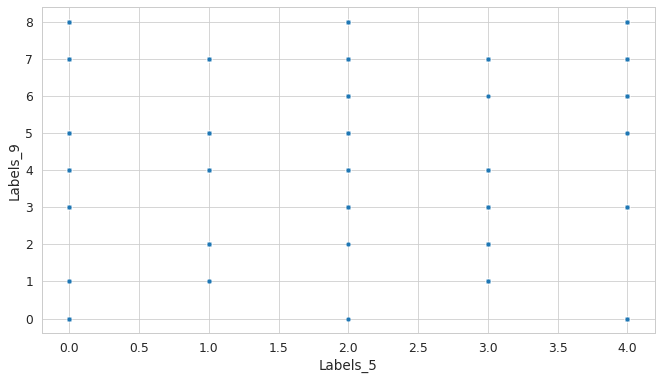

In [85]:
sns.scatterplot(x="Labels_5", y="Labels_9", data=df_ct_labels)

In [86]:
def get_df_similarity(df, k_i):
    df_cluster_k5 = df.loc[np.where(df.Labels_5 == k_i)]
    similarity = df_cluster_k5.groupby(["Labels_5", "Labels_9"]).size().reset_index(name='common_projects')
    den = (df_cluster_k5.Labels_5 == k_i).sum()
    similarity["similarity"] = similarity["common_projects"]/den
    return similarity
#get_df_similarity(df_ct_labels, 4)
frames = [get_df_similarity(df_ct_labels, k) for k in range(len(centroids))]
result = pd.concat(frames, ignore_index=True)
result

Labels_5  Labels_9  common_projects  similarity
0          0         0                8    0.000384
1          0         1                3    0.000144
2          0         3             5719    0.274411
3          0         4             2527    0.121251
4          0         5              706    0.033876
5          0         7             2159    0.103594
6          0         8             9719    0.466340
7          1         1                2    0.000074
8          1         2            14557    0.537337
9          1         4             6408    0.236536
10         1         5             5062    0.186852
11         1         7             1062    0.039201
12         2         0                1    0.000040
13         2         2                1    0.000040
14         2         3                9    0.000360
15         2         4              169    0.006757
16         2         5            10375    0.414817
17         2         6            14392    0.575427
18         2         7                8    0.000320
19         2         8               56    0.002239
20         3         1            22235    0.856246
21         3         2               18    0.000693
22         3         3             3303    0.127195
23         3         4              327    0.012592
24         3         6                1    0.000039
25         3         7               84    0.003235
26         4         0            12924    0.862578
27         4         3               62    0.004138
28         4         5                2    0.000133
29         4         6             1828    0.122005
30         4         7               18    0.001201
31         4         8              149    0.009945

- El clúster 0 de la agrupación en 5 grupos (k = 5) se disgrega en los clústeres 8 y 3 principalmente, con un 46,63% o 9719 proyectos y con un 27,44% o 5719 proyectos. En menor proporción se encuentran proyectos del clúster 0 en los clústeres 4 y 7 del clustering k-means con k=9.
- El clúster 1 de la agrupación en 5 clústeres (k=5) se divide básicamente en tres grupos del clustering en 9 clústeres (k=9): el clúster 2, el clúster 4 y el clúster 5. El clúster 2 es la cohesión del 53,73% de los proyectos del clúster 1 de la agrupación con k=5. Los clústeres 4 y 5 representan el 23,65% y el 18,68% respectivamente.
- El clúster 2 de la agrupación con k=5 se segmenta en dos grupos principalmente al emplear un agrupamiento K-Means con k=9, que son el clúster 5 y el clúster 6. El clúster 5 se corresponde con un 41,48% de los proyectos del clúster 2 del clustering con k=5 y el clúster 6 representa el 57,54% de los proyectos.
- El clúster 3 del clustering con k=5 coincide en un 85,62% con el clúster 1 del clustering con k=9, con 22235 proyectos coincidentes. El resto de los proyectos van a parar fundamentalmente a la agrupación 3 del clustering con k=9.
- El clúster 4 de la agrupación con k=5 coincide en un 86,26% con el clúster 0 del clustering con k=9. El resto de proyectos van a parar principalmente al clúster 6.

Se reduce el dataframe obtenido al conjunto de grupos en que principalmente se disgregan los clústeres del agrupamiento con k=5.

In [87]:
result.loc[np.where(result.common_projects >1063)]

Labels_5  Labels_9  common_projects  similarity
2          0         3             5719    0.274411
3          0         4             2527    0.121251
5          0         7             2159    0.103594
6          0         8             9719    0.466340
8          1         2            14557    0.537337
9          1         4             6408    0.236536
10         1         5             5062    0.186852
16         2         5            10375    0.414817
17         2         6            14392    0.575427
20         3         1            22235    0.856246
22         3         3             3303    0.127195
26         4         0            12924    0.862578
29         4         6             1828    0.122005

Se observan a continuación semejanzas y diferencias entre las dimensiones analizadas en los proyectos de Dr. Snap! para poder extraer conclusiones de por qué los clústeres con k=5 se disgregan en los grupos comentados en el clustering k=9.

In [88]:
df_0_8 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 0) & (df_ct_labels.Labels_9 == 8))]
df_0_3 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 0) & (df_ct_labels.Labels_9 == 3))]
df_0_4 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 0) & (df_ct_labels.Labels_9 == 4))]
df_0_7 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 0) & (df_ct_labels.Labels_9 == 7))]
df_0_8.mean() # Cluster 8

Conditional           2.031896
Synchronization       0.283568
Flow Control          1.645848
Abstraction           2.864595
Parallelism           0.990843
Diversity             2.266797
User Interactivity    2.797304
Data                  2.191172
Labels_5              0.000000
Labels_9              8.000000
dtype: float64

In [89]:
df_0_3.mean()

Conditional           2.269977
Synchronization       0.423151
Flow Control          1.762196
Abstraction           0.449379
Parallelism           0.468788
Diversity             2.144955
User Interactivity    2.895611
Data                  1.926735
Labels_5              0.000000
Labels_9              3.000000
dtype: float64

In [90]:
df_0_4.mean()

Conditional           0.053423
Synchronization       0.055006
Flow Control          1.629996
Abstraction           2.990107
Parallelism           0.708350
Diversity             2.034824
User Interactivity    2.509300
Data                  2.707558
Labels_5              0.000000
Labels_9              4.000000
dtype: float64

In [91]:
df_0_7.mean()

Conditional           2.863363
Synchronization       0.090320
Flow Control          1.436313
Abstraction           2.780917
Parallelism           0.542381
Diversity             2.086614
User Interactivity    0.521538
Data                  2.163038
Labels_5              0.000000
Labels_9              7.000000
dtype: float64

Inspeccionando la media de cada clúster se ve por qué se disgrega el clúster 0 de k=5 en cuatro clústeres del clustering con k=9. El clúster 3 se distingue de los demás por la escasa puntuación media de los proyectos en abstracción. El clúster 4 difiere de los demás porque los proyectos del grupo apenas emplean condicionales. El clúster 7 cuenta con proyectos con escasa puntuación en interactividad con el usuario, mientras que en los clústeres 3, 4 y 8 toman de media valores elevados en dicha dimensión. El clúster 8 difiere poco de los demás, salvo en lo comentado con el resto de grupos.

In [92]:
df_cluster_1_k5 = df_ct_labels.loc[np.where(df_ct_labels.Labels_5 == 1)]
similarity = df_cluster_1_k5.groupby(["Labels_5", "Labels_9"]).size().reset_index(name='common_projects')
den = (df_cluster_1_k5.Labels_5 == 1).sum()
similarity["similarity"] = similarity["common_projects"]/den
similarity

Labels_5  Labels_9  common_projects  similarity
0         1         1                2    0.000074
1         1         2            14557    0.537337
2         1         4             6408    0.236536
3         1         5             5062    0.186852
4         1         7             1062    0.039201

In [93]:
df_1_2 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 1) & (df_ct_labels.Labels_9 == 2))]
df_1_4 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 1) & (df_ct_labels.Labels_9 == 4))]
df_1_5 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 1) & (df_ct_labels.Labels_9 == 5))]

In [94]:
df_1_2.mean()

Conditional           0.010442
Synchronization       0.189393
Flow Control          0.829635
Abstraction           2.986398
Parallelism           0.089510
Diversity             1.373772
User Interactivity    0.458474
Data                  0.457374
Labels_5              1.000000
Labels_9              2.000000
dtype: float64

In [95]:
df_1_4.mean()

Conditional           0.022472
Synchronization       0.063983
Flow Control          1.058989
Abstraction           2.998439
Parallelism           0.378745
Diversity             1.641854
User Interactivity    0.568976
Data                  2.803839
Labels_5              1.000000
Labels_9              4.000000
dtype: float64

In [96]:
df_1_5.mean()

Conditional           0.025879
Synchronization       0.164362
Flow Control          1.511063
Abstraction           2.977874
Parallelism           1.237060
Diversity             1.745753
User Interactivity    1.139273
Data                  0.730541
Labels_5              1.000000
Labels_9              5.000000
dtype: float64

El clúster 1 de k=5 se ha disgregado en los clústeres 2, 4 y 5 del agrupamiento con k=9 principalmente por la diferencia existente en las puntuaciones de control de flujo, paralelismo e interactividad con el usuario entre el clúster 2 y el clúster 5, y por la elevada puntuación en representación de los datos del clúster 4 con respecto a los otros dos.

In [97]:
df_2_5 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 2) & (df_ct_labels.Labels_9 == 5))]
df_2_6 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 2) & (df_ct_labels.Labels_9 == 6))]

In [98]:
df_2_5.mean()

Conditional           0.088771
Synchronization       0.492048
Flow Control          2.006265
Abstraction           2.219277
Parallelism           1.935036
Diversity             1.966940
User Interactivity    1.326554
Data                  1.028241
Labels_5              2.000000
Labels_9              5.000000
dtype: float64

In [99]:
df_2_6.mean()

Conditional           0.151126
Synchronization       2.296067
Flow Control          1.610270
Abstraction           2.272026
Parallelism           2.907657
Diversity             1.847276
User Interactivity    1.423082
Data                  1.057740
Labels_5              2.000000
Labels_9              6.000000
dtype: float64

El clúster 2 de k=5 se ha dividido en los clústeres 5 y 6 de la agrupación k means con k=9 por las diferencias existentes entre ambos grupos en sincronización y en paralelismo.

In [100]:
df_3_1 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 3) & (df_ct_labels.Labels_9 == 1))]
df_3_3 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 3) & (df_ct_labels.Labels_9 == 3))]
df_3_1.mean()

Conditional           0.057162
Synchronization       0.353362
Flow Control          1.638948
Abstraction           0.641961
Parallelism           0.574140
Diversity             1.846188
User Interactivity    1.084821
Data                  0.995458
Labels_5              3.000000
Labels_9              1.000000
dtype: float64

In [101]:
df_3_3.mean()

Conditional           0.873448
Synchronization       0.388435
Flow Control          1.688162
Abstraction           0.154405
Parallelism           0.152891
Diversity             2.097487
User Interactivity    2.773236
Data                  1.215562
Labels_5              3.000000
Labels_9              3.000000
dtype: float64

El clúster 3 del clustering con k=5 se divide principalmente en 2 grupos, el clúster 1 y el clúster 3 que se distinguen entre sí principalmente por las puntuaciones en interactividad con el usuario y en menor medida, por las puntuaciones en el uso de condicionales.

In [102]:
df_4_0 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 4) & (df_ct_labels.Labels_9 == 0))]
df_4_6 = df_ct_labels.loc[np.where((df_ct_labels.Labels_5 == 4) & (df_ct_labels.Labels_9 == 6))]
df_4_0.mean()

Conditional           2.491566
Synchronization       2.534974
Flow Control          2.414578
Abstraction           2.470365
Parallelism           2.833333
Diversity             2.614206
User Interactivity    2.478722
Data                  2.060198
Labels_5              4.000000
Labels_9              0.000000
dtype: float64

In [103]:
df_4_6.mean()

Conditional           1.024070
Synchronization       2.690372
Flow Control          1.937090
Abstraction           2.293217
Parallelism           2.942013
Diversity             2.243435
User Interactivity    2.284464
Data                  1.472101
Labels_5              4.000000
Labels_9              6.000000
dtype: float64

La diferencia existente entre el clúster 0 y el clúster 6 del agrupamiento con k=9 radica principalmente en la valoración media del uso de condicionales de los proyectos de ambos grupos. El proyecto más representativo del clúster 4 en el clustering con k=5 coincide en las puntuaciones de cada dimensión con el proyecto más cercano al centroide del clúster 0 en el algoritmo de agrupamiento con k=9.

Si volvemos a la curva de Elbow podemos calcular la distancia a una recta que une los dos extremos de la curva de inercia. El punto más distante perpendicularmente de la recta a la curva determinaría el valor de k.

205187.84164490146
[9.260589327767704e-16, 5.250159357263836, 7.153776767935692, 8.167930105517215, 8.741893636873744, 8.707624828868429, 8.513562127156808, 8.250803116092131, 7.623429666534336, 6.997127770112193, 6.335364445466592, 5.6893011584732704, 5.034923674638644, 4.146275936201538, 3.3578649108468213, 2.4645274801515584, 1.7230836900897457, 0.7943354602344521, 9.260589327767704e-16]


6

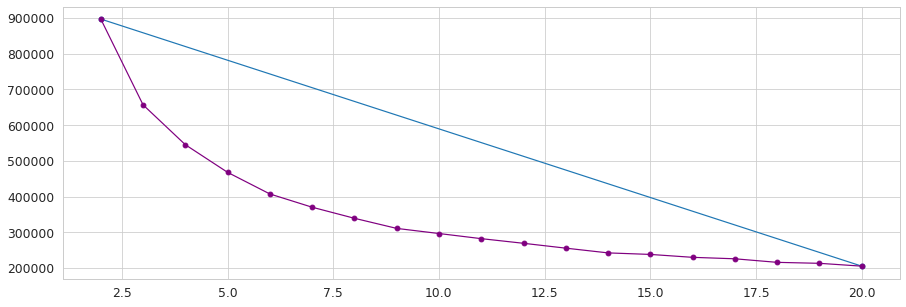

In [104]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)       
    print(distances)
    n = distances.index(max(distances)) + 2
    plt.figure(figsize=(15,5))
    plt.plot([x2, x1], [y2,y1],  marker='o')
    plt.plot(range(x1,x2+1), wcss, color='purple', marker='o')
    return n
print(inertia)
n = optimal_number_of_clusters(sse)
n

## Análisis de clustering entre niveles o puntuaciones totales.


Se agrupan los proyectos en función de su puntuación media. Aplicando el algoritmo de clustering K-Means se consigue el proyecto más representativo de cada grupo, que será el más cercano al centro o centroide. Se muestra en un dataframe los diferentes proyectos más representativos para cada puntuación. 

In [105]:
def get_df_representative(df, n):
    df_n1 = df_total_group.get_group(n).loc[:, "Conditional":"Data"]
    kmeans_n1 = KMeans(n_clusters=1).fit(df_n1)
    center_n1 = kmeans_n1.cluster_centers_
    closest_n1, _ = pairwise_distances_argmin_min(kmeans_n1.cluster_centers_, df_n1)    
    df_n1_representative = df_n1.iloc[closest_n1]
    return df_n1_representative

frames = [get_df_representative(df_total_group, n) for n in total_average]
dataframe_by_avg = pd.concat(frames)
dataframe_by_avg

Conditional  Synchronization  Flow Control  Abstraction  Parallelism  \
142              0                0             0            0            0   
1184             0                0             0            0            0   
1393             0                0             1            0            0   
125              0                0             0            3            0   
12395            0                0             1            2            0   
13089            0                0             1            2            0   
88               0                0             1            1            1   
5                0                0             2            1            1   
27               0                0             1            3            1   
157              0                0             2            2            2   
11851            0                1             1            2            2   
11643            1                1             2            2            2   
221              1                1             2            2            2   
62               1                1             2            2            2   
1326             1                2             2            2            2   
6843             2                2             2            2            2   
11336            2                2             2            3            2   
11504            2                2             2            2            3   
1512             2                2             2            3            3   
249              2                3             2            3            3   
244              3                3             3            2            3   
74               3                3             3            3            3   
75               3                3             3            3            3   
1008             3                3             3            3            3   

       Diversity  User Interactivity  Data  
142            1                   0     0  
1184           1                   0     1  
1393           1                   1     0  
125            1                   0     0  
12395          1                   0     1  
13089          2                   0     1  
88             2                   1     1  
5              2                   1     1  
27             2                   1     1  
157            2                   1     1  
11851          2                   2     1  
11643          2                   1     1  
221            2                   2     1  
62             2                   2     2  
1326           2                   2     2  
6843           2                   2     2  
11336          2                   2     2  
11504          2                   3     2  
1512           3                   2     2  
249            3                   2     2  
244            3                   2     2  
74             3                   2     2  
75             3                   3     2  
1008           3                   3     3

Comparando los proyectos más representativos para cada puntuación, se visualiza de manera gráfica cuál es la ruta de aprendizaje seguida por los programadores de los proyectos Snap! Se observa como evolucionan las distintas capacidades o dimensiones del pensamiento computacional consideradas en el análisis con Dr. Snap!, según aumenta la puntuación total asignada a los proyectos. Para hacer más evidente dicha puntuación se deja en función de la puntuación total, en vez de en función de la puntuación media.

Text(0, 0.5, 'Total score')

<Figure size 1152x720 with 0 Axes>

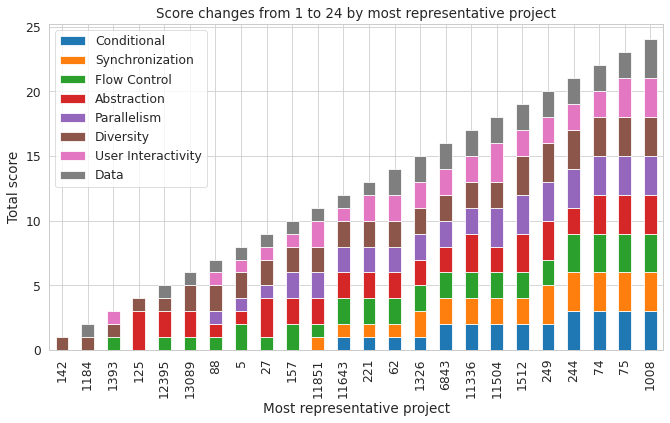

In [106]:
plt.figure(figsize=(16, 10))
dataframe_by_avg.plot(kind="bar", stacked=True)
plt.title("Score changes from 1 to 24 by most representative project")
plt.xlabel("Most representative project")
plt.ylabel("Total score")

- Cambio de nivel entre 1 y 2: No hay proyectos con 0 puntos totales, ya que siempre habrá un proyecto con bloques de 1 o 2 categorías diferentes. Por ello diversidad sigue valiendo 1 punto. Representación de los datos aumenta en un punto. Se definen atributos para los personajes.
- Cambio de nivel entre 2 y 3: Representación de los datos ya no puntúa. En cambio, tanto en control de flujo como en interactividad con el usuario se consigue 1 punto. Esto implica que hay una secuencia ordenada de bloques en un script que comienza a ejecutarse al presionar la bandera verde.
- Cambio de nivel entre 3 y 4: Diversidad se mantiene en un punto. Control de flujo e interactividad con el usuario pasan a valer 0 puntos, mientras abstracción sube abruptamente de 0 a 3 puntos. Hay bloques propios definidos por el programador en el proyecto de Dr. Snap!
- Cambio de nivel entre 4 y 5 puntos: Abstracción vale en este caso 2 puntos, de modo que hay 2 o más scripts encargados de tareas sencillas y 2 o más personajes u objetos en el programa. Control de flujo y representación de los datos consiguen 1 punto. Cada script sigue una secuencia de bloques debidamente ordenada y los personajes cuentan con atributos. Diversidad se mantiene en un punto.
- Cambio de nivel entre 5 y 6 puntos: Diversidad pasa a valer 2 puntos. Existen entre 3 y 6 categorías distintas de bloques.
- Cambio de nivel entre 6 y 7 puntos: Abstracción disminuye su puntuación a 1 punto. Hay dos o más scripts que hacen más sencilla la comprensión del programa y un único personaje. Paralelismo se evalúa con 1 punto, de manera que hay dos flujos de código que se ejecutan a la vez. Interactividad con el usuario vuelve a valer 1 punto.
- Cambio de nivel entre 7 y 8 puntos: Control de flujo incrementa su puntuación a 2 puntos, pues el código contiene bucles.
- Cambio de nivel entre 8 y 9 puntos: Control de flujo disminuye su puntuación de 2 a 1 punto. Abstracción aumenta de 1 a 3 puntos. De manera que en los scripts con secuencias de bloques ordenadas hay bloques propios encargados de funcionalidades determinadas programados por el desarrollador del proyecto de Dr. Snap!
- Cambio de nivel entre 9 y 10 puntos: Control de flujo y paralelismo incrementan su puntuación en 2 puntos. Habrá por tanto dos objetos que ejecutan el mismo script a la vez y bucles dentro del programa. Abstracción disminuye su puntuación a 2 puntos. Por lo tanto, hay varios scripts que ejecutan tareas específicas cuando son llamados en el orden adecuado, haciendo más comprensible el programa en Dr. Snap!
- Cambio de nivel entre 10 y 11 puntos: Control de flujo decrementa su puntuación a 1 punto. Interactividad con el usuario aumenta su puntuación de 1 a 2 puntos de modo que se tienen en cuenta las acciones que realiza el usuario sobre el programa, como cuando presiona sobre el teclado o mueve determinado objeto. Sincronización comienza a tener valor con 1 punto, esperando que ocurra un evento determinado para ejecutar los bloques correspondientes.
- Cambio de nivel entre 11 y 12 puntos: Se emplean condicionales, en concreto un if, por lo que esta dimensión empieza a puntuar. Control de flujo vale de nuevo dos puntos, pues se emplean bucles. Interactividad con el usuario retrocede, valiendo de nuevo 1 punto.
- Cambio de nivel entre 12 y 13 puntos: Interactividad con el usuario incrementa su puntuación a 2 puntos. El usuario actúa sobre el programa presionando alguna tecla o pulsando sobre un objeto con el ratón.
- Cambio de nivel entre 13 y 14 puntos: Representación de los datos aumenta de 1 a 2 puntos. Se incluyen bloques para definir y operar sobre variables.
- Cambio de nivel entre 14 y 15 puntos: Sincronización incrementa su valor de 1 a 2 puntos. Distintos scripts se intercambian mensajes para saber el orden en que se ejecutan.
- Cambio de nivel entre 15 y 16 puntos: Se emplean bloques if-else para ejecutar conjuntos de bloques dependiendo de la condición. Por ello condicionales vale 2 puntos.
- Cambio entre 16 y 17 puntos: Abstracción eleva su puntuación a 3 puntos. Hay bloques definidos por el programador.
- Cambio entre 17 y 18 puntos: Abstracción disminuye su puntuación a 2 puntos. Paralelismo incrementa su valor a 3 puntos. Se ejecutan dos scripts en el mismo momento tras recibir cierta condición o mensaje. Interactividad con el usuario también aumenta su valor a 3 puntos, pues el usuario ha introducido audio o vídeo.
- Cambio entre 18 y 19 puntos: Abstracción vuelve a valer 3 puntos. Diversidad incrementa su puntuación a 3 puntos, porque hay 7 u 8 categorías diferentes de bloques. Interactividad con el usuario desciende a los 2 puntos, pues la acción del usuario se reduce a mover o pulsar con el ratón cierto objeto.
- Cambio entre 19 y 20 puntos: Sincronización aumenta su puntuación a los 3 puntos. 
- Cambio entre 20 y 21 puntos: El uso de condicionales y control de flujo aumentan su valor de 2 a 3 puntos, pues se emplean operadores lógicos para evaluar condiciones y ejecutar sentencias en función del resultado. Abstracción disminuye a los 2 puntos. 
- Cambio entre 21 y 22 puntos: Abstracción consigue la máxima puntuación, que es de 3 puntos. El programador definen bloques propios que emplea en el programa de Dr. Snap!
- Cambio entre 22 y 23 puntos: Interactividad con el usuario incrementa su puntuación alcanzando los 3 puntos. De nuevo hay preguntas, audio o vídeo que el usuario introduce durante la ejecución del programa.
- Cambio entre 23 y 24 puntos: Representación de los datos alcanza los 3 puntos. Se definen listas y se realizan operaciones sobre ellas y sobre los elementos o que contienen.